<a href="https://colab.research.google.com/github/mrozik1141/Trainings/blob/main/Machine_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

data = {
    'size': ['XL', 'L', 'M', 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', 'male', 'female', 'female'],
    'price': [199.0, 89.0, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']
}

df_raw = pd.DataFrame(data=data)
df_raw

size  color  gender  price  weight bought
0   XL    red  female  199.0     500    yes
1    L  green    male   89.0     450     no
2    M   blue    male   99.0     300    yes
3    L  green  female  129.0     380     no
4    M    red  female   79.0     410    yes

In [ ]:
df=df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   5 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      int64  
 5   bought  5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 372.0+ bytes


In [ ]:
for col in ['size', 'color', 'gender', 'bought']:
    df[col]=df[col].astype('category')
df['weight']=df['weight'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   size    5 non-null      category
 1   color   5 non-null      category
 2   gender  5 non-null      category
 3   price   5 non-null      float64 
 4   weight  5 non-null      float64 
 5   bought  5 non-null      category
dtypes: category(4), float64(2)
memory usage: 744.0 bytes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df['bought'])


array([1, 0, 1, 0, 1])

In [ ]:
le.classes_

array(['no', 'yes'], dtype=object)

In [ ]:
df['bought']=encoder.fit_transform(df[['size']])

In [ ]:
df

size  color  gender  price  weight  bought
0   XL    red  female  199.0   500.0       1
1    L  green    male   89.0   450.0       0
2    M   blue    male   99.0   300.0       1
3    L  green  female  129.0   380.0       0
4    M    red  female   79.0   410.0       1

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first')
encoder.fit_transform(df[['size']])

<5x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
encoder.categories_

[array(['L', 'M', 'XL'], dtype=object)]

In [ ]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

size  color  gender  price  weight bought
0   XL    red  female  199.0   500.0    yes
1    L  green    male   89.0   450.0     no
2    M   blue     NaN    NaN   300.0    yes
3  NaN  green  female  129.0     NaN     no
4    M    red  female   79.0   410.0    yes
5    M  green    male   89.0     NaN     no

In [ ]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 420.0+ bytes


In [ ]:
df.isnull()

size  color  gender  price  weight  bought
0  False  False   False  False   False   False
1  False  False   False  False   False   False
2  False  False    True   True   False   False
3   True  False   False  False    True   False
4  False  False   False  False   False   False
5  False  False   False  False    True   False

In [ ]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(df[['weight']])

SimpleImputer()

In [ ]:
imputer.statistics_

array([415.])

In [ ]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [ ]:
df['weight']  = imputer.transform(df[['weight']])
df

size  color  gender  price  weight bought
0   XL    red  female  199.0   500.0    yes
1    L  green    male   89.0   450.0     no
2    M   blue     NaN    NaN   300.0    yes
3  NaN  green  female  129.0   415.0     no
4    M    red  female   79.0   410.0    yes
5    M  green    male   89.0   415.0     no

In [ ]:
imputer=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=99.0)
imputer.fit_transform(df[['price']])
df['price']=imputer.fit_transform(df[['price']])
df

size  color  gender  price  weight bought
0   XL    red  female  199.0   500.0    yes
1    L  green    male   89.0   450.0     no
2    M   blue     NaN   99.0   300.0    yes
3  NaN  green  female  129.0   415.0     no
4    M    red  female   79.0   410.0    yes
5    M  green    male   89.0   415.0     no

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])
df['size'] = imputer.fit_transform(df[['size']])
df


array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [ ]:
#Metoda gradientu prostego


import plotly.express as px
np.random.seed(42)


In [ ]:
X1=np.array([1,2,3,4,5,6])
Y=np.array([3000,3250,3500,3750,4000, 4250])
m=len(X1)

print(f'Lata pracy: {X1}')
print(f'Wynagrodzenie: {Y}')
print(f'Liczba próbek: {m}')

Lata pracy: [1 2 3 4 5 6]
Wynagrodzenie: [3000 3250 3500 3750 4000 4250]
Liczba próbek: 6


In [ ]:
X1 = X1.reshape(m,1)
Y = Y.reshape(-1,1)
print(X1)
print(X1.shape)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
(6, 1)


In [ ]:
print(Y)
print(Y.shape)

[3000 3250 3500 3750 4000 4250]
(6,)


In [ ]:
bias = np.ones((m,1))
print(bias)
print(bias.shape)


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(6, 1)


In [ ]:
X=np.append(bias,X1,axis=1)
print(X)
print(X.shape)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
(6, 2)


In [ ]:
eta=0.01
weight = np.random.randn(2,1)
print(weight)
print(X.dot(weight))

[[1.57921282]
 [0.76743473]]
[[2.34664754]
 [3.11408227]
 [3.881517  ]
 [4.64895173]
 [5.41638646]
 [6.18382119]]


In [ ]:
intercept=[]
coef=[]
for i in range(3000):
    gradient = (2/m) * X.T.dot(X.dot(weight)-Y)
    weight = weight - eta * gradient
    intercept.append(weight[0][0])
    coef.append(weight[1][0])
print(weight)


[[2749.95599732]
 [ 250.01027812]]


In [ ]:
df = pd.DataFrame(data={'intercept': intercept, 'coef': coef})
df

intercept        coef
0       72.286919  268.186609
1      124.568118  450.109920
2      163.069062  573.190142
3      192.184370  656.240965
4      214.903815  712.061633
...           ...         ...
2995  2749.955349  250.010430
2996  2749.955512  250.010391
2997  2749.955674  250.010354
2998  2749.955836  250.010316
2999  2749.955997  250.010278

[3000 rows x 2 columns]

In [ ]:
px.line(df, x=df.index, y=['intercept'])

In [ ]:
px.line(df, x=df.index, y=['coef'])

In [ ]:
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120, formatter=dict(float=lambda x: f"{x:.2f}"))
sns.set(font_scale=1.3)

In [ ]:
from sklearn.datasets import make_regression
data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30, random_state=42)
print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


In [ ]:
dane=pd.DataFrame(data=np.c_[target], columns=['y_tre'])
dane


y_tre
0   74.594475
1  -37.462691
2  -16.455140
3    5.346170
4  -13.212612
..        ...
95  79.622978
96 -93.964334
97 -56.612461
98  19.029250
99 -38.921249

[100 rows x 1 columns]

In [ ]:
data[5:]


array([[ 0.64768854],
       [-0.46341769],
       [ 0.54256004],
       [ 0.61167629],
       [ 1.0035329 ],
       [ 0.8219025 ],
       [ 1.53803657],
       [ 0.73846658],
       [-0.21967189],
       [-0.8084936 ],
       [ 0.09176078],
       [-1.95967012],
       [ 0.51326743],
       [ 1.03099952],
       [-2.6197451 ],
       [ 0.49671415],
       [ 0.09707755],
       [-0.46572975],
       [ 0.91540212],
       [ 1.56464366],
       [ 1.46564877],
       [-0.60063869],
       [-0.03582604],
       [-0.60170661],
       [-1.19620662],
       [ 0.35711257],
       [ 0.37569802],
       [ 0.26105527],
       [-0.5297602 ],
       [-0.90802408],
       [ 0.19686124],
       [-0.29900735],
       [ 0.36163603],
       [ 0.82254491],
       [-0.29169375],
       [ 0.36139561],
       [-0.676922  ],
       [ 1.52302986],
       [-0.51827022],
       [-0.23415337],
       [-0.39210815],
       [-0.3011037 ],
       [-0.64511975],
       [ 0.32875111],
       [ 0.2088636 ],
       [-0

In [ ]:
target[:5]

array([ 74.59447456, -37.46269129, -16.45513974,   5.34617009,
       -13.21261185])

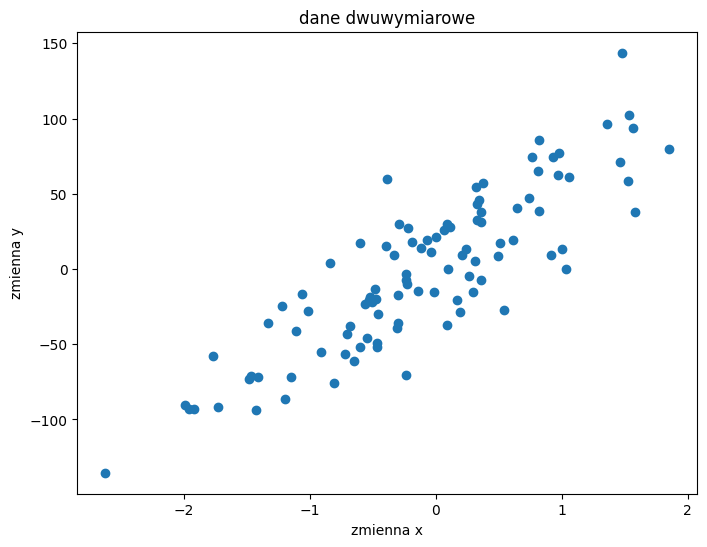

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("dane dwuwymiarowe")
plt.xlabel('zmienna x')
plt.ylabel('zmienna y')
plt.scatter(data, target, label='cecha x')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(data, target)

NameError: name 'data' is not defined

In [ ]:
regressor.score(data,target)

0.7426670084336404

In [ ]:
y_pred=regressor.predict(data)
y_pred

array([ 4.99003911e+01,  7.83284125e+00, -4.92096591e+01,  1.91540735e+01,
       -2.03815754e+01,  3.57692185e+01, -1.95964376e+01,  3.05307382e+01,
        3.39747530e+01,  5.35006972e+01,  4.44501801e+01,  8.01346458e+01,
        4.02926256e+01, -7.45075249e+00, -3.67913319e+01,  8.06772208e+00,
       -9.41536629e+01,  2.90711077e+01,  5.48693401e+01, -1.27044743e+02,
        2.82462691e+01,  8.33265320e+00, -1.97116460e+01,  4.91092013e+01,
        8.14604587e+01,  7.65276119e+01, -2.64340651e+01,  1.71015918e+00,
       -2.64872790e+01, -5.61108040e+01,  2.12900188e+01,  2.22161187e+01,
        1.65035499e+01, -2.29022391e+01, -4.17508666e+01,  1.33048054e+01,
       -1.14039838e+01,  2.15154193e+01,  4.44821908e+01, -1.10395521e+01,
        2.15034394e+01, -3.02352098e+01,  7.93868718e+01, -2.23297011e+01,
       -8.17235498e+00, -1.60431325e+01, -1.15084432e+01, -2.86505259e+01,
        1.98767867e+01,  1.39028746e+01, -1.28318325e+01,  3.75014597e+00,
       -8.17153690e+00,  

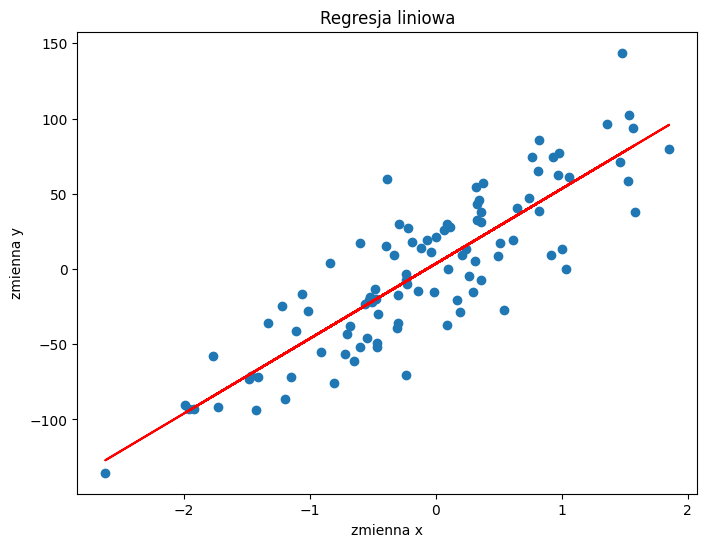

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Regresja liniowa")
plt.xlabel('zmienna x')
plt.ylabel('zmienna y')
plt.plot(data, y_pred, color='red', label='model')
plt.scatter(data, target, label='cecha x')
plt.show()

In [ ]:
#Regresja wielomianowa

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.3)



In [ ]:
X=np.arange(-10,10,0.5)
noise=80*np.random.randn(len(X))
y=X-X**3 + 10*X**2 - 2*X + 3 + noise
X=X.reshape(40,1)

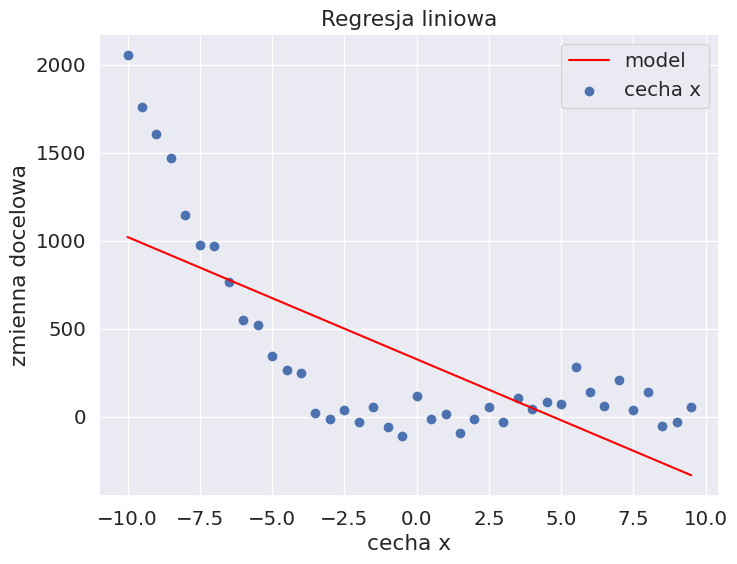

In [ ]:
regressor = LinearRegression()
regressor.fit(X,y)
y_pred_lin=regressor.predict(X)

plt.figure(figsize=(8,6))
plt.title("Regresja liniowa")
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.plot(X, y_pred_lin, c='red', label='model')
plt.scatter(X, y, label='cecha x')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,y_pred_lin)

0.5271527426227878

In [ ]:
df=pd.DataFrame(data={'X':X.ravel()})
df.head()

X
0 -10.0
1  -9.5
2  -9.0
3  -8.5
4  -8.0

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [ ]:
df=pd.DataFrame(X_poly)
df.columns=["1","x","x^2"]

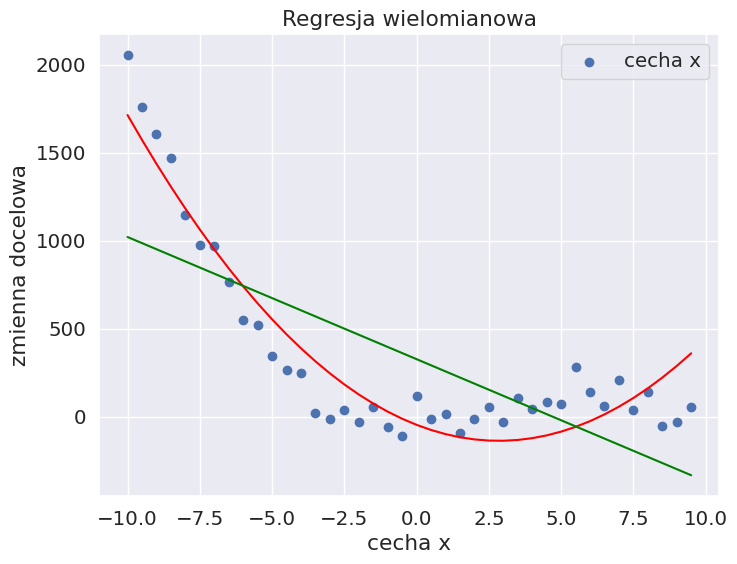

In [ ]:
regressor_poly=LinearRegression()
regressor_poly.fit(X_poly,y)
y_pred_2=regressor_poly.predict(X_poly)

plt.figure(figsize=(8,6))
plt.title("Regresja wielomianowa")
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X,y,label='cecha x')
plt.plot(X,y_pred_2,c='red')
plt.plot(X,y_pred_lin, c='green')
plt.legend()
plt.show()

In [ ]:
r2_score(y,y_pred_2)

0.8935106625169735

In [ ]:
poly=PolynomialFeatures(degree=3)
X_poly_3=poly.fit_transform(X)
X_poly_3
#

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

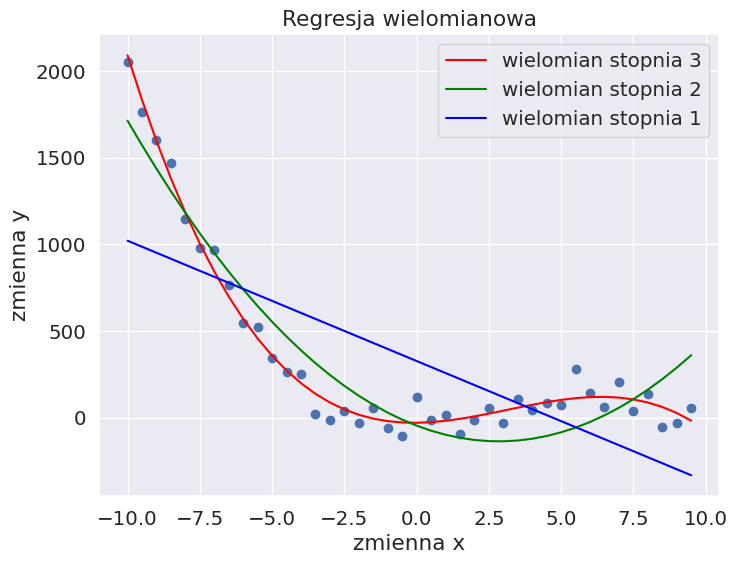

In [ ]:
regressor_poly_3=LinearRegression()
regressor_poly_3.fit(X_poly_3,y)
y_pred_3=regressor_poly_3.predict(X_poly_3)


plt.figure(figsize=(8,6))
plt.title("Regresja wielomianowa")
plt.xlabel('zmienna x')
plt.ylabel('zmienna y')
plt.scatter(X,y)
plt.plot(X,y_pred_3,c='red', label="wielomian stopnia 3")
plt.plot(X,y_pred_2, c='green', label="wielomian stopnia 2")
plt.plot(X,y_pred_lin, c='blue', label="wielomian stopnia 1")
plt.legend()
plt.show()


In [ ]:
r2_score(y,y_pred_3)
#

0.9843519737250662

In [ ]:
#Regresja drzew decyzyjnych
np.random.seed(42)

from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import make_regression

In [ ]:
data,target=make_regression(n_samples=200, n_features=1,  noise=20)
target=target**2

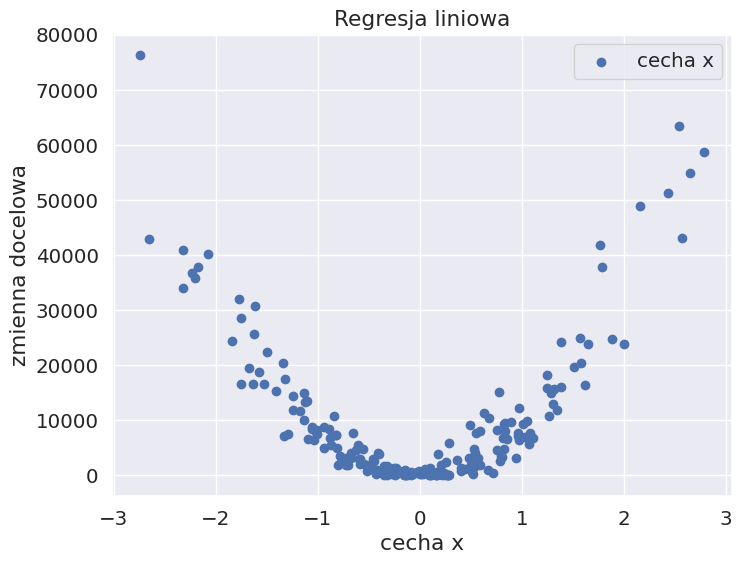

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Regresja liniowa")
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.legend()
plt.show()

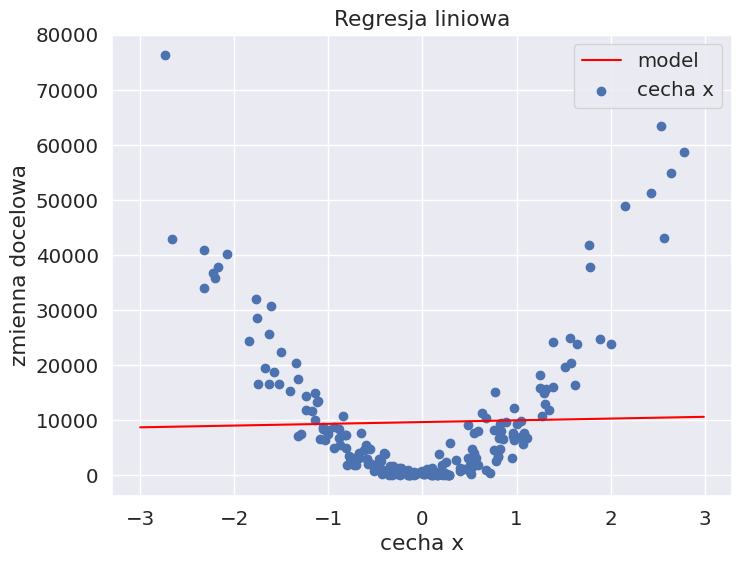

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(data, target)
y_pred_lin=regressor.predict(data)

plot_data=np.arange(-3,3,0.01).reshape(-1,1)

plt.figure(figsize=(8,6))
plt.title("Regresja liniowa")
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.plot(plot_data, regressor.predict(plot_data), c='red', label='model')
plt.scatter(data, target, label='cecha x')
plt.legend()
plt.show()

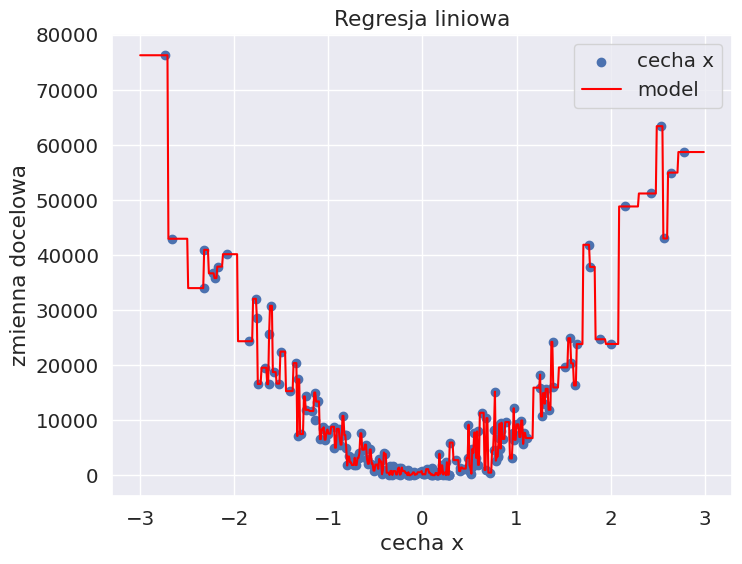

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(data, target)

plt.figure(figsize=(8,6))
plt.title("Regresja liniowa")
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(plot_data, regressor.predict(plot_data), c='red', label='model')
plt.legend()
plt.show()

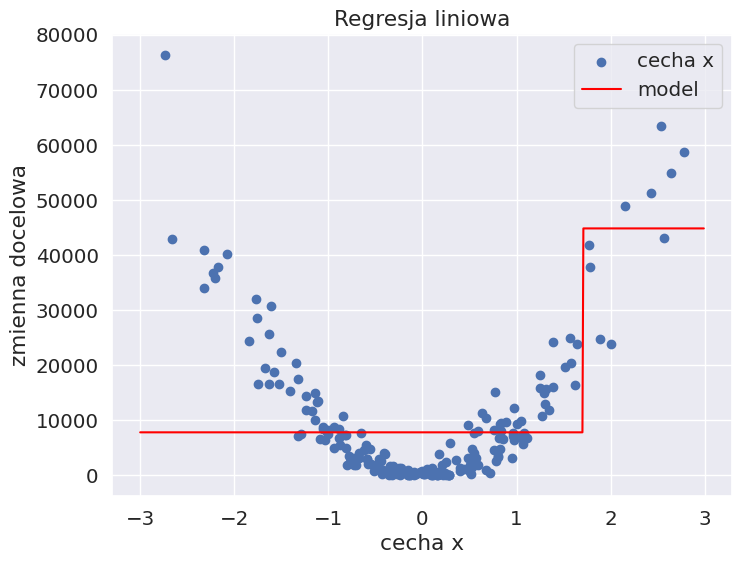

In [ ]:
regressor = DecisionTreeRegressor(max_depth=1)
regressor.fit(data, target)

plt.figure(figsize=(8,6))
plt.title("Regresja liniowa")
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(plot_data, regressor.predict(plot_data), c='red', label='model')
plt.legend()
plt.show()

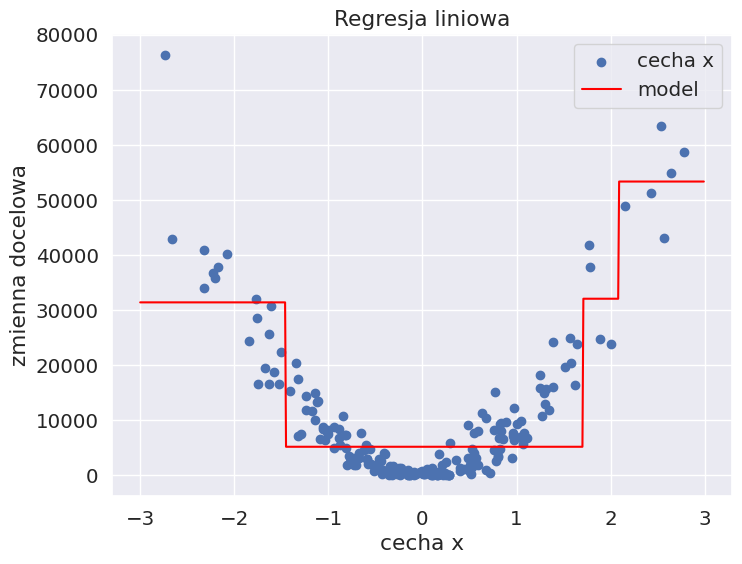

In [ ]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(data, target)

plt.figure(figsize=(8,6))
plt.title("Regresja liniowa")
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(plot_data, regressor.predict(plot_data), c='red', label='model')
plt.legend()
plt.show()

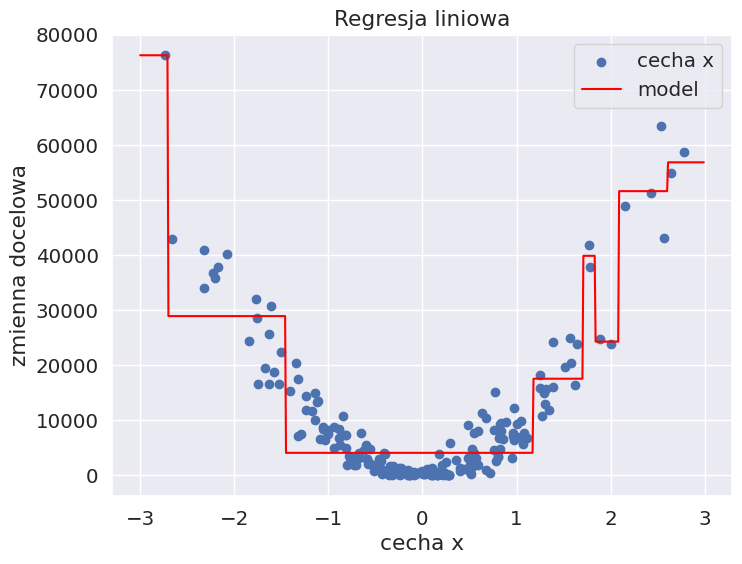

In [ ]:
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(data, target)

plt.figure(figsize=(8,6))
plt.title("Regresja liniowa")
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(plot_data, regressor.predict(plot_data), c='red', label='model')
plt.legend()
plt.show()

In [ ]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

def make_dt_regression(max_depth=2):
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(data, target)

    plt.figure(figsize=(8,6))
    plt.plot(plot_data, regressor.predict(plot_data), c='red')
    plt.scatter(data, target)

    dot_data=StringIO()
    export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=['cecha x'])
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')
    return Image(graph.create_png(), width=300 + max_depth * 100)



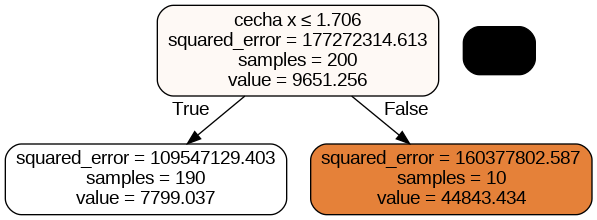

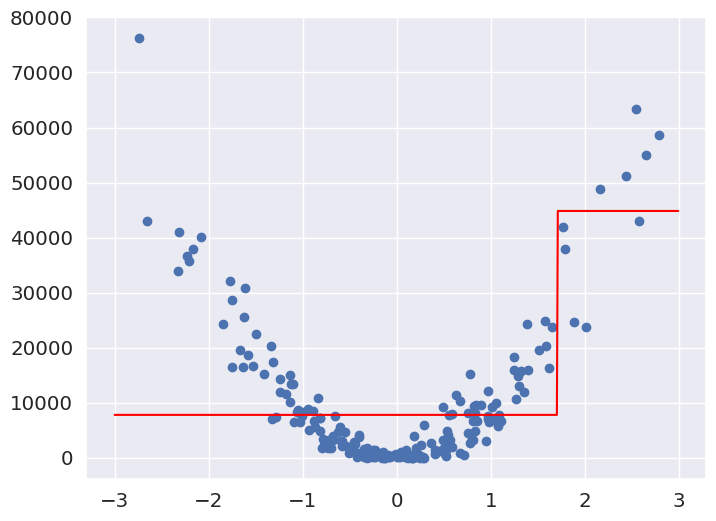

In [ ]:
make_dt_regression(max_depth=1)

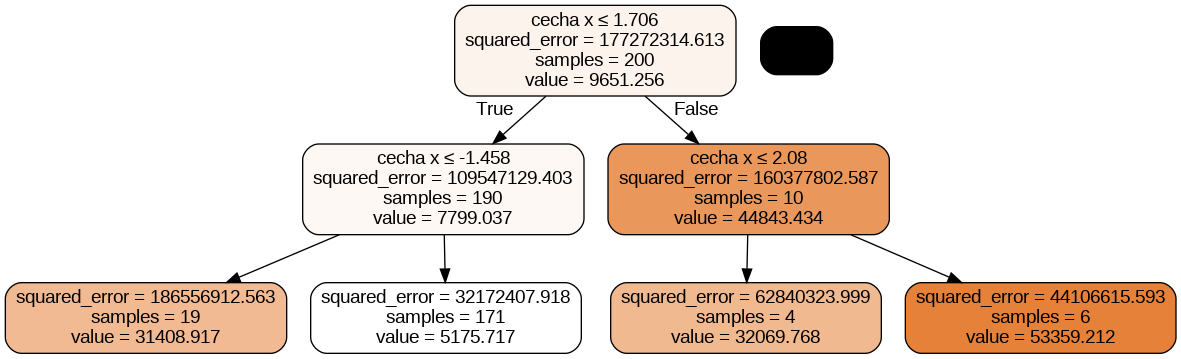

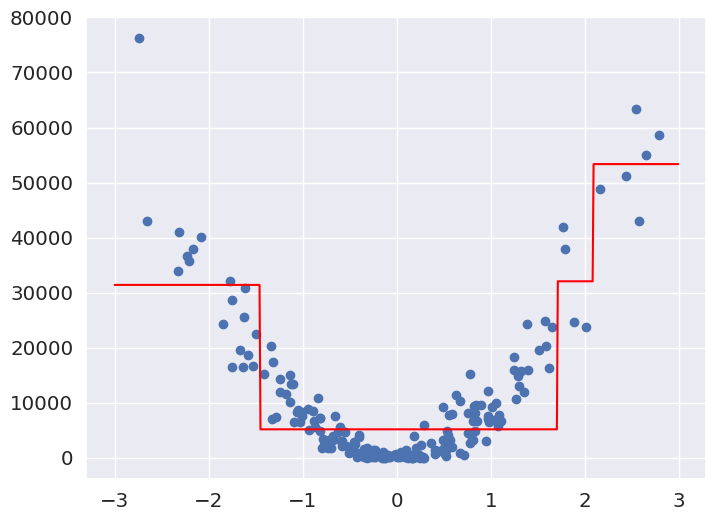

In [ ]:
make_dt_regression(max_depth=2)

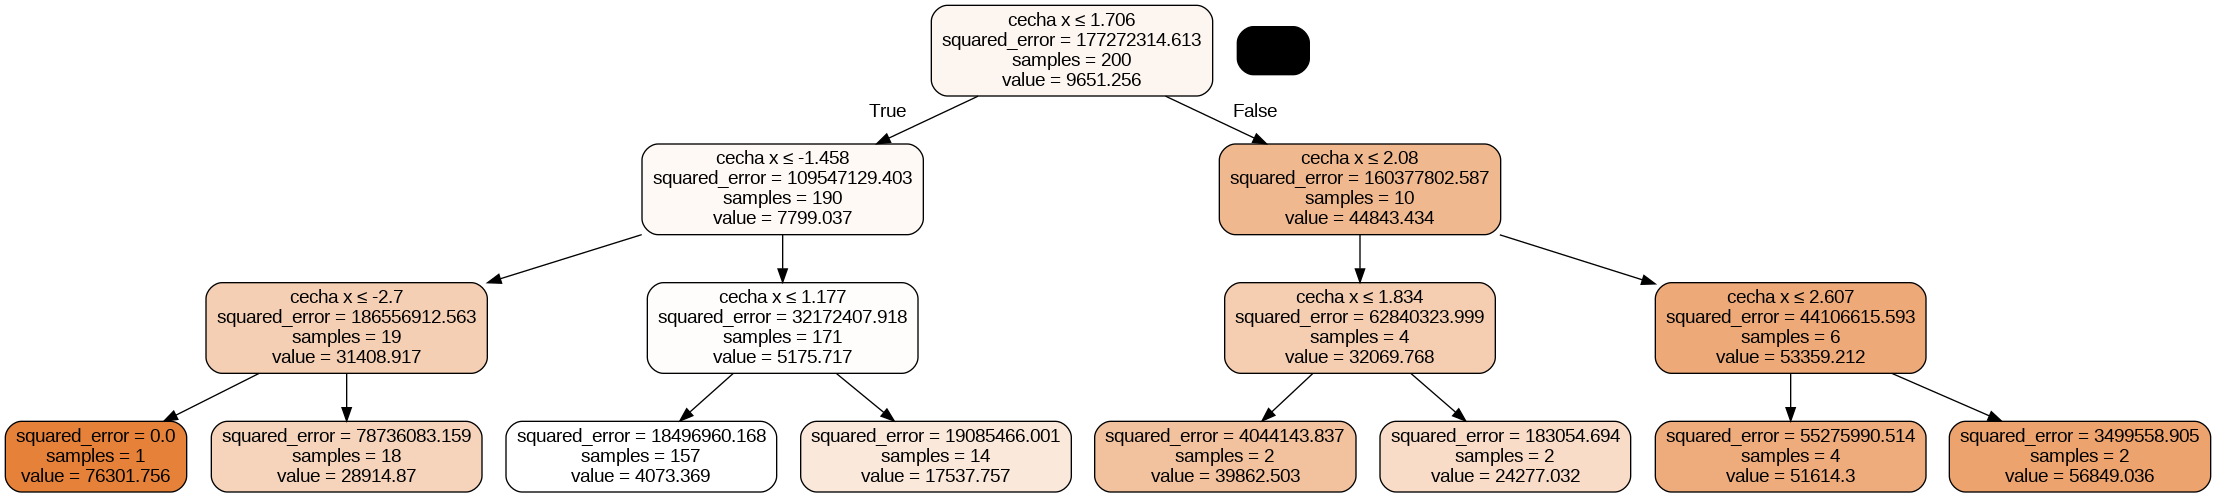

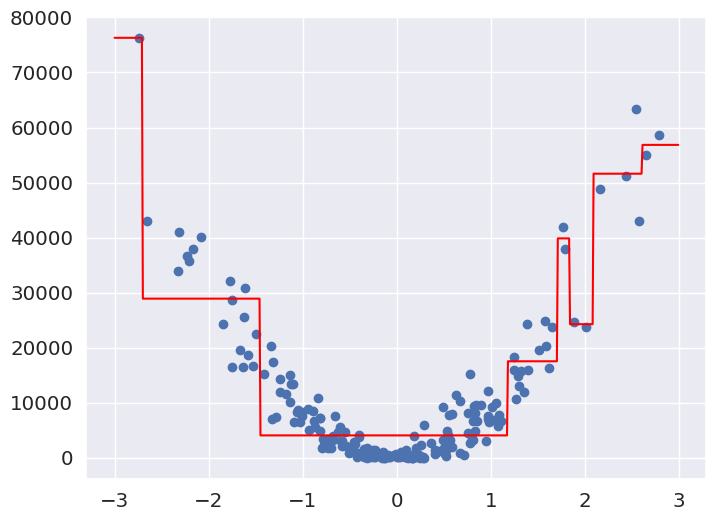

In [ ]:
make_dt_regression(max_depth=3)

In [ ]:
#Ocena modeli regresyjnych


import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
np.random.seed(42)





In [ ]:
y_true = 100 + 20*np.random.randn(50)
y_true

array([109.934283,  97.234714, 112.953771, 130.460597,  95.316933,
        95.317261, 131.584256, 115.348695,  90.610512, 110.851201,
        90.731646,  90.685405, 104.839245,  61.734395,  65.501643,
        88.754249,  79.743378, 106.284947,  81.839518,  71.753926,
       129.312975,  95.484474, 101.350564,  71.505036,  89.112346,
       102.218452,  76.980128, 107.51396 ,  87.987226,  94.166125,
        87.965868, 137.045564,  99.730056,  78.845781, 116.450898,
        75.583127, 104.177272,  60.806598,  73.436279, 103.937225,
       114.769332, 103.427366,  97.687034,  93.977926,  70.42956 ,
        85.603116,  90.787225, 121.142445, 106.872366,  64.739197])

In [ ]:
y_pred = y_true + 10* np.random.randn(50)
y_pred

array([113.175123,  93.383891, 106.184551, 136.57736 , 105.626928,
       104.630062, 123.192081, 112.256571,  93.923147, 120.606652,
        85.939904,  88.828815,  93.775896,  49.772329,  73.626902,
       102.31665 ,  79.023276, 116.320276,  85.455879,  65.302728,
       132.926931, 110.86484 , 100.992304,  87.151473,  62.914894,
       110.437477,  77.850599, 104.523887,  88.904834,  74.290436,
        85.769149, 140.616689, 114.508996,  73.663079, 108.365962,
        70.565557, 113.331293,  64.094109,  68.138677, 109.069899,
       115.740107, 113.113816,  90.666503,  90.701305,  66.508479,
        70.967966,  93.748427, 123.752997, 106.9235  ,  62.393326])

In [ ]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results.head()

y_true      y_pred
0  109.934283  113.175123
1   97.234714   93.383891
2  112.953771  106.184551
3  130.460597  136.577360
4   95.316933  105.626928

In [ ]:
results['error']=results['y_true']-results['y_pred']
results.head()

y_true      y_pred      error
0  109.934283  113.175123  -3.240840
1   97.234714   93.383891   3.850823
2  112.953771  106.184551   6.769220
3  130.460597  136.577360  -6.116763
4   95.316933  105.626928 -10.309995

In [ ]:
results['error_squared']=results['error']**2
results.head()


y_true      y_pred      error  error_squared
0  109.934283  113.175123  -3.240840      10.503042
1   97.234714   93.383891   3.850823      14.828836
2  112.953771  106.184551   6.769220      45.822339
3  130.460597  136.577360  -6.116763      37.414788
4   95.316933  105.626928 -10.309995     106.296002

In [ ]:
print(f'MAE - meand absolute error: {results["error"].abs().mean():.4f}')
print(f'MSE - mean squared error: {results["error_squared"].mean():.4f}')
print(f'RMSE - root mean squared error: {np.sqrt(results["error_squared"].mean()):.4f}')

MAE - meand absolute error: 6.7918
MSE - mean squared error: 74.9471
RMSE - root mean squared error: 8.6572


In [ ]:
def plot_regression_results(y_true, y_pred):
    results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    min = results[['y_true', 'y_pred']].min().min()
    max = results[['y_true', 'y_pred']].max().min()

    fig=go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                        go.Scatter(x=[min,max], y=[min,max])],
                  layout=go.Layout(showlegend=False, width=800, xaxis_title='y_true', yaxis_title='y_pred', title='Regresja: y_true vs. y_pred'))
    fig.show()
plot_regression_results(y_true, y_pred)

In [ ]:
#możemy też metryki brać prosto z biblioteki scikit learn


from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true, y_pred)

6.791794588005249

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

74.9471459408194

In [ ]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_true, y_pred)

8.657201969506048

In [ ]:
from sklearn.metrics import max_error

max_error(y_true, y_pred)

26.197451040897448

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.7806774149108962

In [ ]:
#Regresja logistyczna
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

sns.set()


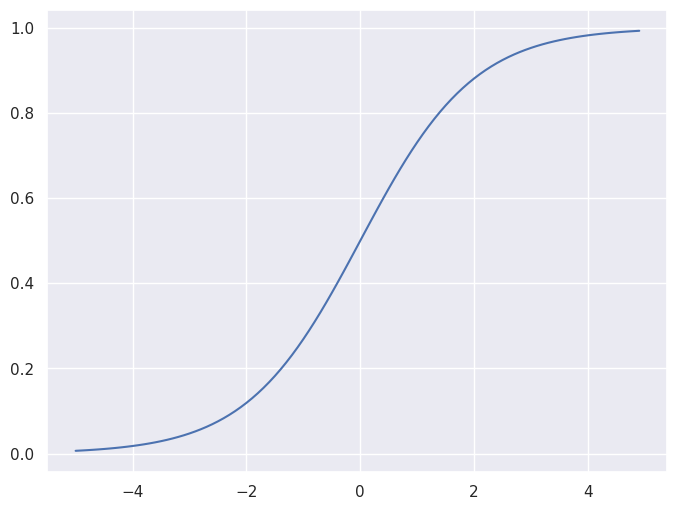

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
X = np.arange(-5, 5, 0.1)
Y = sigmoid(X)

plt.figure(figsize=(8,6))
plt.plot(X,Y)

In [ ]:
from sklearn.datasets import load_breast_cancer

raw_Data = load_breast_cancer()
raw_Data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(raw_Data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
all_data = raw_Data.copy()

data=all_data["data"]
target=all_data["target"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [ ]:
X_train

array([[1.385e+01, 1.721e+01, 8.844e+01, ..., 5.104e-02, 2.364e-01,
        7.182e-02],
       [1.616e+01, 2.154e+01, 1.062e+02, ..., 1.312e-01, 3.480e-01,
        7.619e-02],
       [1.142e+01, 2.038e+01, 7.758e+01, ..., 2.575e-01, 6.638e-01,
        1.730e-01],
       ...,
       [1.377e+01, 2.229e+01, 9.063e+01, ..., 1.673e-01, 3.080e-01,
        9.333e-02],
       [1.382e+01, 2.449e+01, 9.233e+01, ..., 1.521e-01, 3.651e-01,
        1.183e-01],
       [9.029e+00, 1.733e+01, 5.879e+01, ..., 1.750e-01, 4.228e-01,
        1.175e-01]])

In [ ]:
from sklearn.preprocessing import StandardScaler


# skalowanie
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.05066346, -0.49337493, -0.12031655, ..., -0.94313946,
        -0.84195257, -0.69148034],
       [ 0.62042566,  0.50086714,  0.62819403, ...,  0.26317828,
         1.00465352, -0.43624615],
       [-0.75661435,  0.23451129, -0.57802066, ...,  2.16385106,
         6.23008547,  5.21803799],
       ...,
       [-0.07390464,  0.67307997, -0.02801711, ...,  0.80644263,
         0.34278754,  0.56483256],
       [-0.0593789 ,  1.1782376 ,  0.04363086, ...,  0.57769974,
         1.28760123,  2.0232302 ],
       [-1.45123517, -0.46582088, -1.36994148, ...,  0.92231896,
         2.24234291,  1.9765054 ]])

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred=log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
y_prob=log_reg.predict_proba(X_test)
y_prob

array([[5.51646725e-01, 4.48353275e-01],
       [1.17005211e-02, 9.88299479e-01],
       [3.89111192e-05, 9.99961089e-01],
       [1.00000000e+00, 2.60225044e-24],
       [3.06668084e-01, 6.93331916e-01],
       [9.99960629e-01, 3.93711631e-05],
       [9.99999998e-01, 1.79122874e-09],
       [5.03464521e-03, 9.94965355e-01],
       [9.97509052e-01, 2.49094814e-03],
       [9.99998379e-01, 1.62111678e-06],
       [2.61304188e-04, 9.99738696e-01],
       [9.99151643e-01, 8.48357117e-04],
       [2.67249591e-02, 9.73275041e-01],
       [5.60874135e-04, 9.99439126e-01],
       [9.99993821e-01, 6.17882382e-06],
       [6.41443381e-03, 9.93585566e-01],
       [9.99999129e-01, 8.71414285e-07],
       [4.90076943e-02, 9.50992306e-01],
       [9.98091639e-01, 1.90836103e-03],
       [6.11952923e-02, 9.38804708e-01],
       [7.35992260e-04, 9.99264008e-01],
       [9.86182996e-01, 1.38170040e-02],
       [9.99999178e-01, 8.22292348e-07],
       [5.62431772e-04, 9.99437568e-01],
       [1.897451

In [ ]:
#Ocena modelu

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9790209790209791

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

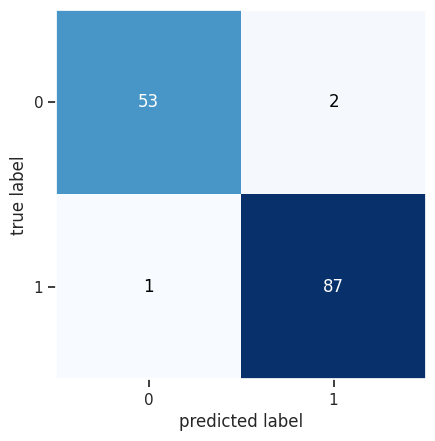

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.98      0.99      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
# K-najbliższych sąsiadów

from sklearn.neighbors import KNeighborsClassifier



In [ ]:
from sklearn.datasets import load_iris
raw_data = load_iris()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
all_data = raw_data.copy()
data = all_data["data"]
target = all_data["target"]

In [ ]:
all_data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df=pd.DataFrame(data=np.c_[data,target], columns=all_data["feature_names"]+["class"])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

In [ ]:
df.describe().T

count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
class              150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0

In [ ]:
df['class'].value_counts()

class
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

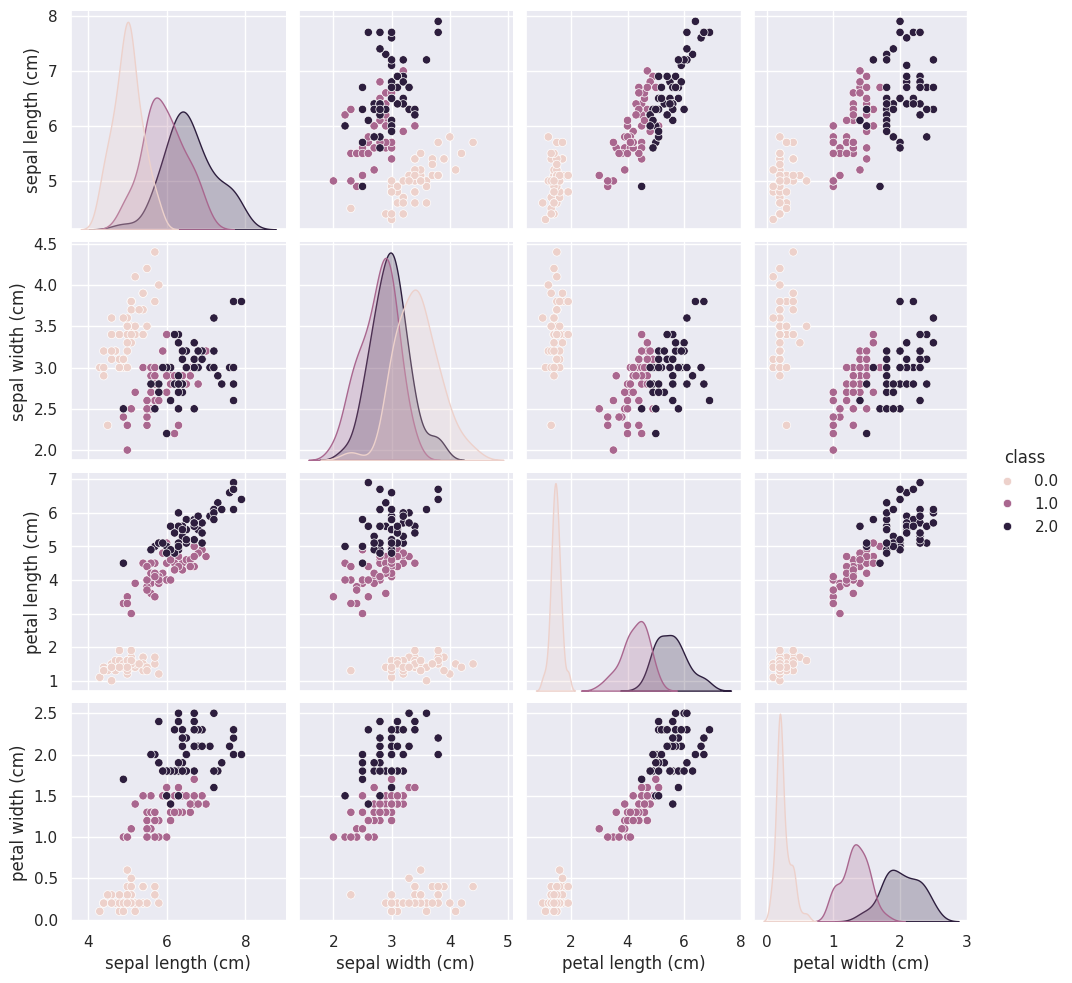

In [ ]:
_=sns.pairplot(df,vars=all_data['feature_names'], hue='class')

In [ ]:
df.corr()


sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
class                       0.782561         -0.426658           0.949035   

                   petal width (cm)     class  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
class                      0.956547  1.000000

In [ ]:
data=data[:,:2]

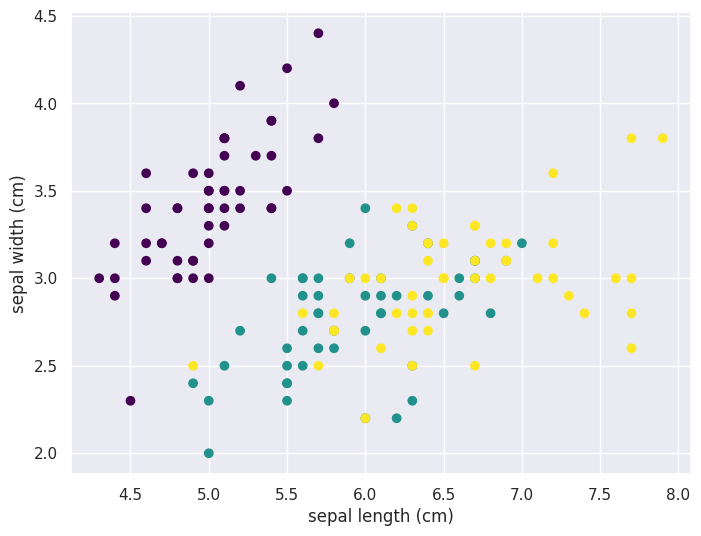

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c=target, cmap='viridis')
plt.xlabel(all_data['feature_names'][0])
plt.ylabel(all_data['feature_names'][1])
plt.show()

In [ ]:
import plotly.express as px
df=pd.DataFrame(data=np.c_[data,target], columns=['sepal_length', 'sepal_width', 'class'])
px.scatter(df, x='sepal_length', y='sepal_width', color='class', width=800)


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data, target)

KNeighborsClassifier()

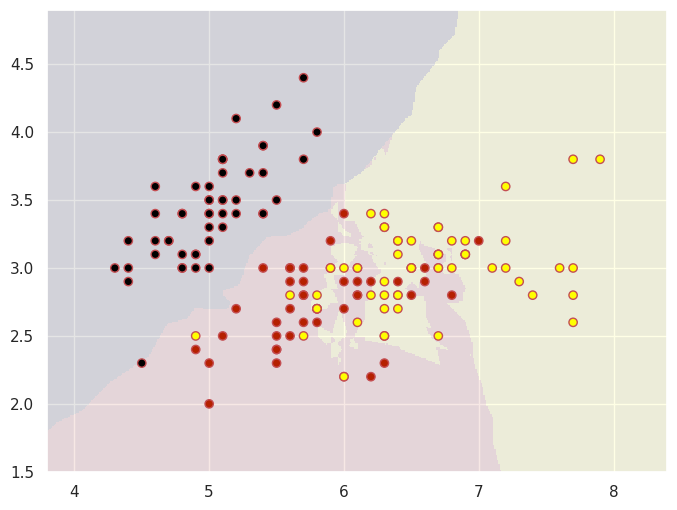

In [ ]:
x_min, x_max = data[:,0].min() - 0.5, data[:,0].max() + 0.5
y_min, y_max = data[:,1].min() - 0.5, data[:,1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

mesh = np.c_[xx.ravel(), yy.ravel()]
Z=classifier.predict(mesh)
Z=Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(data[:,0], data[:,1], c=target, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


In [ ]:
def plot_decision_boundries(n_neighbors=1):
  classifier= KNeighborsClassifier(n_neighbors=n_neighbors)
  classifier.fit(data, target)
  x_min, x_max = data[:,0].min() - 0.5, data[:,0].max() + 0.5
  y_min, y_max = data[:,1].min() - 0.5, data[:,1].max() + 0.5

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

  mesh = np.c_[xx.ravel(), yy.ravel()]
  Z=classifier.predict(mesh)
  Z=Z.reshape(xx.shape)

  plt.figure(figsize=(8,6))
  plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
  plt.scatter(data[:,0], data[:,1], c=target, cmap='gnuplot', edgecolors='r')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  plt.show()



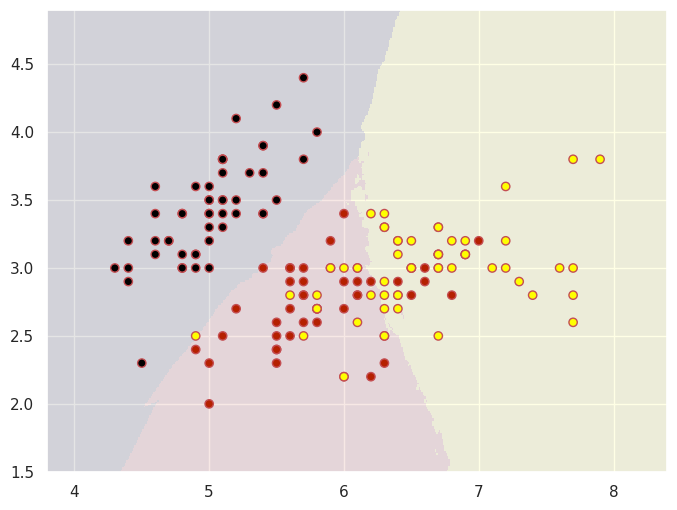

In [ ]:
plot_decision_boundries(n_neighbors=50)

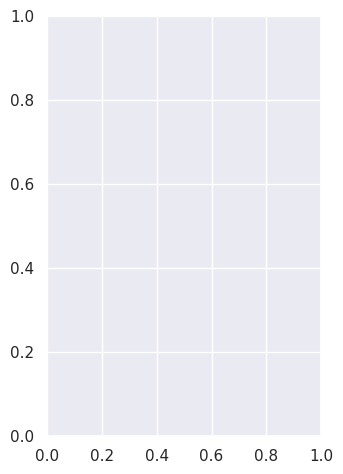

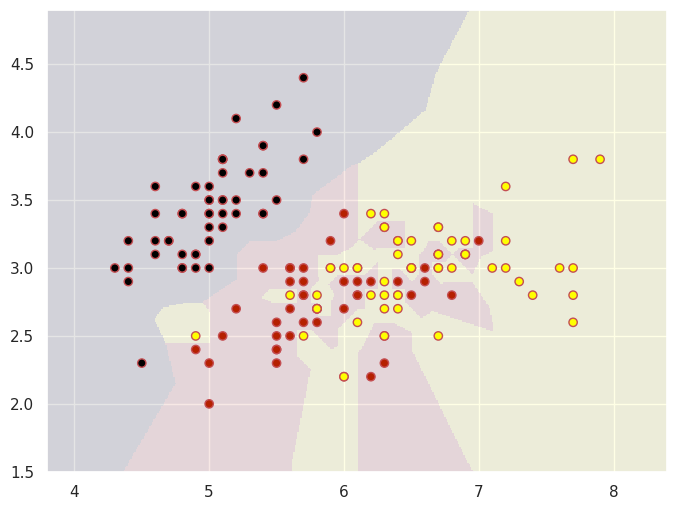

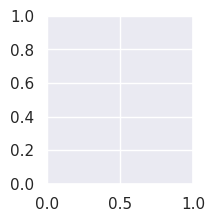

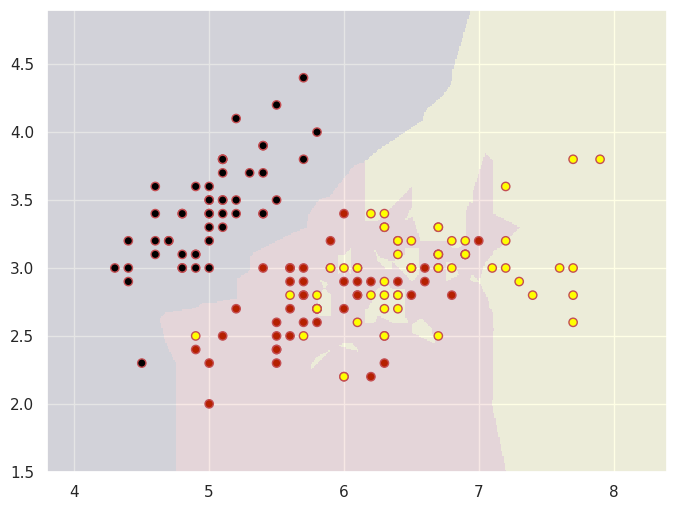

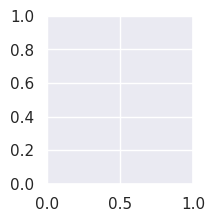

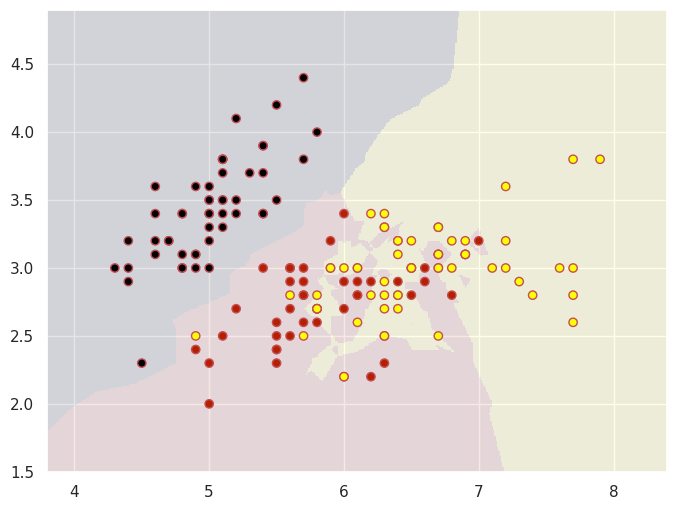

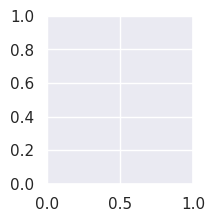

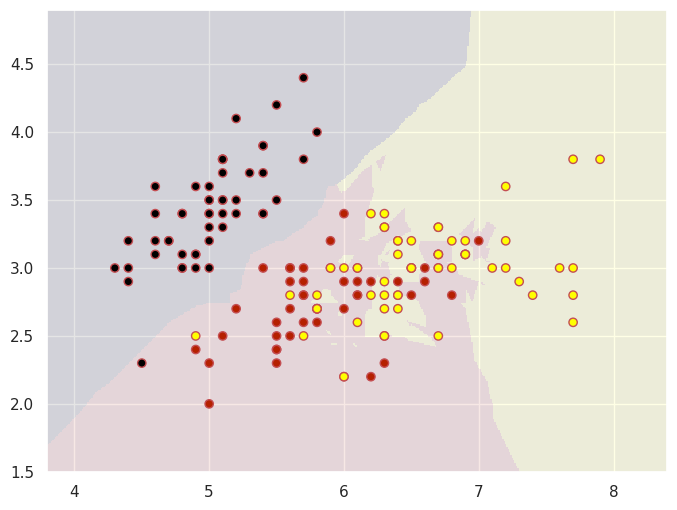

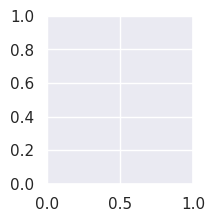

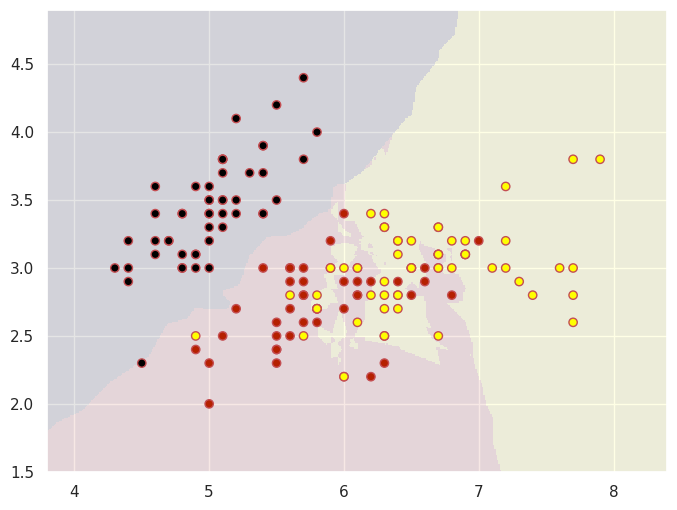

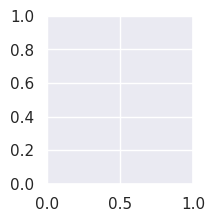

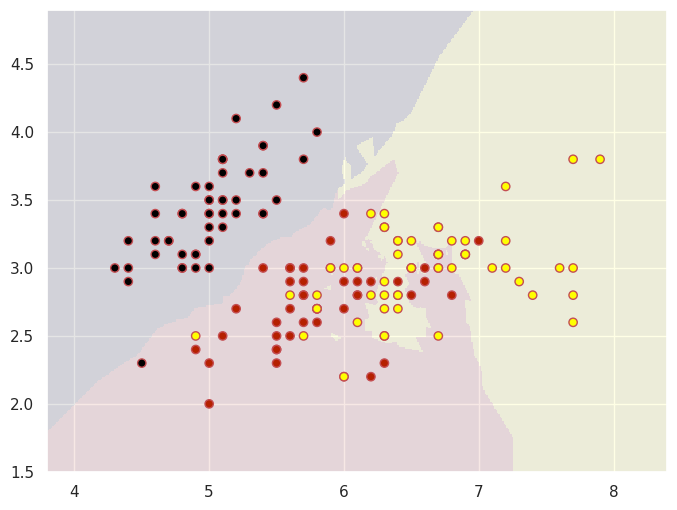

In [ ]:
 plt.figure(figsize=(12,12))


for i in range(1,7):
  plt.subplot(2,3,i)
  plot_decision_boundries(n_neighbors=i)






In [67]:
# Drzewa decyzyjne - klasyfikacja
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image

sns.set(font_scale=1.3)
np.random.seed(42)

In [68]:
raw_data=load_iris()
all_data=raw_data.copy()
data=all_data["data"]
target=all_data["target"]
feature_names=[name.replace(' ', '_')[:-5]for name in all_data['feature_names']]
target_names = all_data['target_names']

In [60]:
len(data)

150

In [69]:
data.shape

(150, 4)

In [70]:
df=pd.DataFrame(data=np.c_[data,target], columns=feature_names + ["target"])
df.head()

sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2     0.0
1           4.9          3.0           1.4          0.2     0.0
2           4.7          3.2           1.3          0.2     0.0
3           4.6          3.1           1.5          0.2     0.0
4           5.0          3.6           1.4          0.2     0.0

Text(0, 0.5, 'sepal width (cm)')

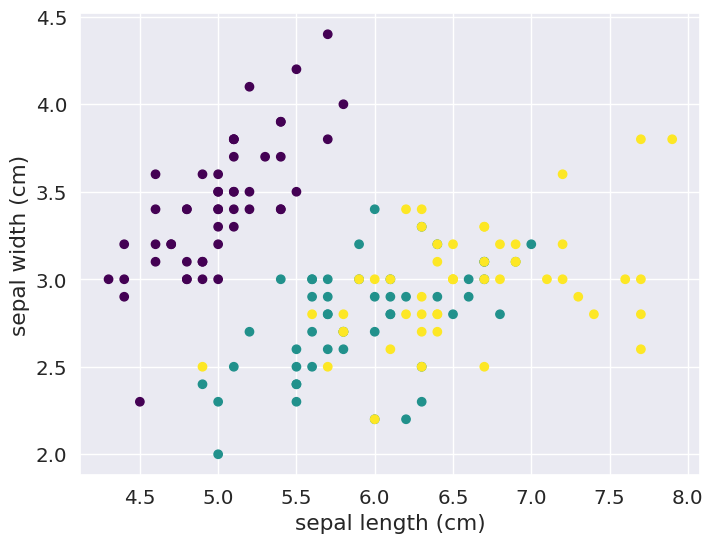

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c=target, cmap='viridis')
plt.xlabel(all_data['feature_names'][0])
plt.ylabel(all_data['feature_names'][1])

In [75]:
data=data[:,[0,1]]
target=df['target'].apply(int).values

array([[1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
        1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
        1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
        1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
        4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
        4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
        4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
        4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
        5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
        6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
        6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
        5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
        0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       

In [78]:
classifier=DecisionTreeClassifier(max_depth = 5, random_state=42)
classifier.fit(data, target)

DecisionTreeClassifier(max_depth=5, random_state=42)

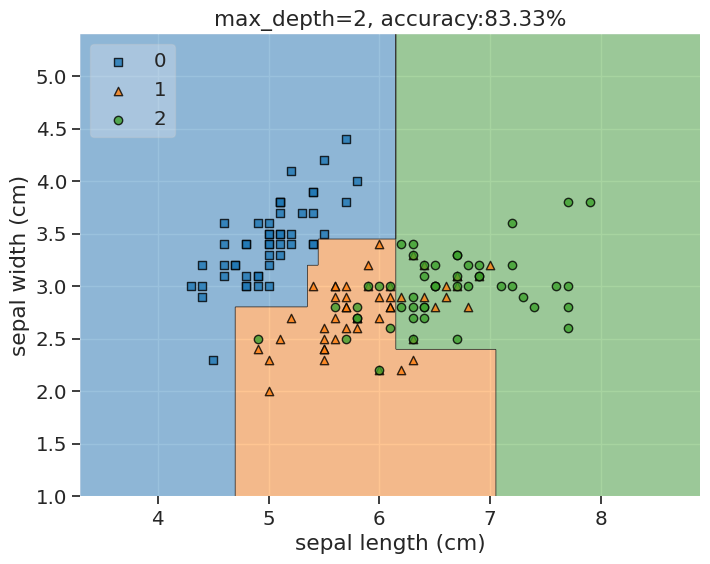

In [89]:
classifier=DecisionTreeClassifier(max_depth = 4, random_state=42)
classifier.fit(data, target)

from mlxtend.plotting import plot_decision_regions

acc = classifier.score(data,target)

plt.figure(figsize=(8,6))
plot_decision_regions(data, target, classifier, legend=2)
plt.xlabel(all_data['feature_names'][0])
plt.ylabel(all_data['feature_names'][1])
plt.title(f'max_depth=2, accuracy:{acc*100:.2f}%')
plt.show()

In [ ]:
#Lasy losowe


from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
np.random.seed(42)

In [ ]:
from sklearn.datasets import load_iris
raw_data=load_iris()
all_data=raw_data.copy()

data=all_data["data"]
target=all_data["target"]
feature_names=all_data['feature_names']
target_names = all_data['target_names']

In [ ]:
df=pd.DataFrame(data=np.c_[data,target], columns=feature_names + ["target"])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [ ]:
data=data[:,[0,1]]
target=df['target'].apply(int).values

In [ ]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(data, target)

RandomForestClassifier(random_state=42)

In [ ]:
classifier.score(data, target)

0.9266666666666666

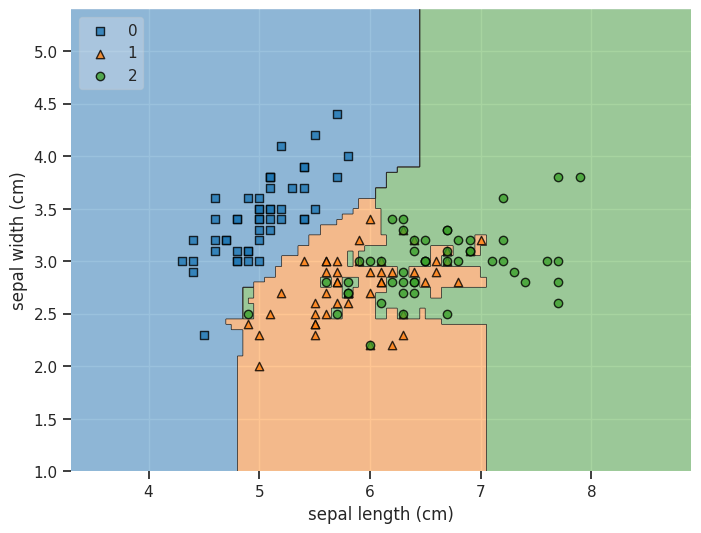

In [ ]:
from mlxtend.plotting import plot_decision_regions


plt.figure(figsize=(8,6))
plot_decision_regions(data, target, classifier, legend=2)
plt.xlabel(all_data['feature_names'][0])
plt.ylabel(all_data['feature_names'][1])
plt.show()

In [ ]:
# Klasyfikacja wektorów nośnych

from sklearn.svm import SVC
np.random.seed(42)


In [ ]:
from sklearn.datasets import load_iris
raw_data=load_iris()
all_data=raw_data.copy()

data=all_data["data"]
target=all_data["target"]
feature_names=all_data['feature_names']
target_names = all_data['target_names']

df=pd.DataFrame(data=np.c_[data,target], columns=feature_names + ["target"])
df=df[(df['target']==0) | (df['target']==1)]
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [ ]:
data=df.iloc[:, [2,1]].values
target = df['target'].apply(int).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(C=1.0, kernel='linear')
classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
classifier.score(X_test, y_test)

1.0

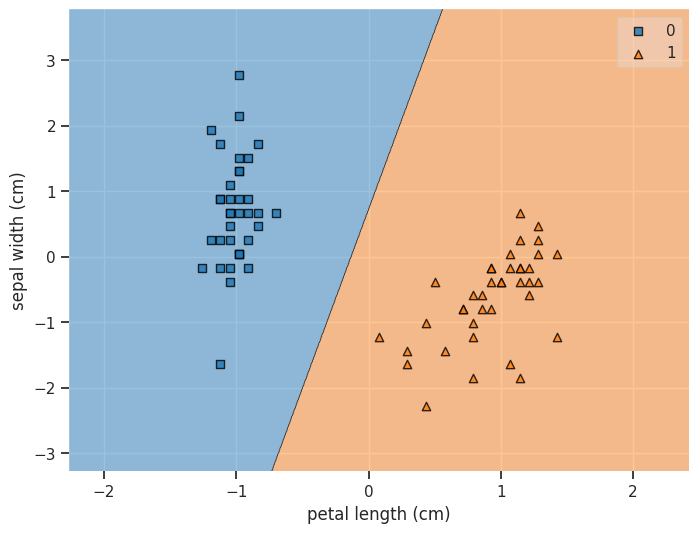

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(all_data['feature_names'][2])
plt.ylabel(all_data['feature_names'][1])
plt.show()

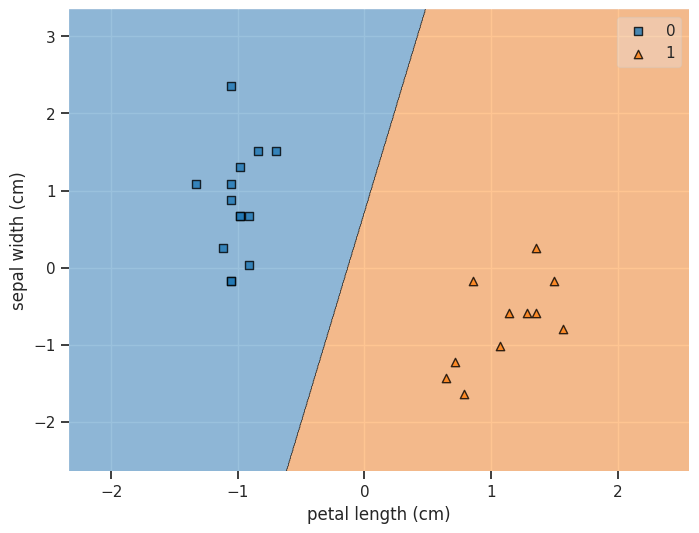

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(all_data['feature_names'][2])
plt.ylabel(all_data['feature_names'][1])
plt.show()

In [ ]:
classifier = SVC(C=1.0, kernel='rbf')
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

1.0

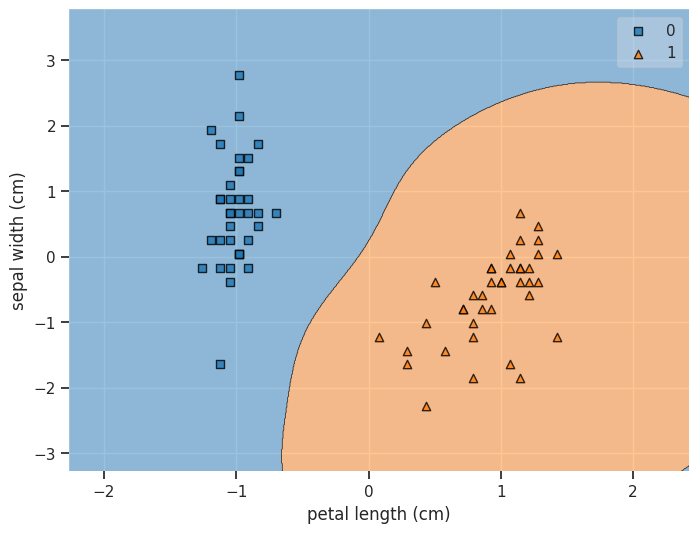

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(all_data['feature_names'][2])
plt.ylabel(all_data['feature_names'][1])
plt.show()

In [ ]:
# Naiwny klasyfikator Bayesowski (Naive Bayes)

# Naiwny, bo zakładamy, że zmienne są względem siebie niezależne


from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

data=pd.DataFrame(data={'pogoda': ['słonecznie', ' deszczowo', 'pochmurno', 'deszczowo','słonecznie', 'słonecznie', 'pochmurno', 'pochmurno', 'słonecznie'],
                        'temperatura': ['ciepło', 'zimno','ciepło','ciepło','ciepło', 'umiarkowanie', 'umiarkowanie', 'ciepło', 'zimno'],
                        'spacer': ['tak', 'nie', 'tak', 'nie', 'tak', 'tak', 'nie', 'tak', 'nie']})
data

pogoda   temperatura spacer
0  słonecznie        ciepło    tak
1   deszczowo         zimno    nie
2   pochmurno        ciepło    tak
3   deszczowo        ciepło    nie
4  słonecznie        ciepło    tak
5  słonecznie  umiarkowanie    tak
6   pochmurno  umiarkowanie    nie
7   pochmurno        ciepło    tak
8  słonecznie         zimno    nie

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['spacer'] = encoder.fit_transform(data['spacer'])


In [ ]:
df=pd.get_dummies(data, columns=['pogoda', 'temperatura'], drop_first=True)
df

spacer  pogoda_deszczowo  pogoda_pochmurno  pogoda_słonecznie  \
0       1             False             False               True   
1       0             False             False              False   
2       1             False              True              False   
3       0              True             False              False   
4       1             False             False               True   
5       1             False             False               True   
6       0             False              True              False   
7       1             False              True              False   
8       0             False             False               True   

   temperatura_umiarkowanie  temperatura_zimno  
0                     False              False  
1                     False               True  
2                     False              False  
3                     False              False  
4                     False              False  
5                      True              False  
6                      True              False  
7                     False              False  
8                     False               True

In [ ]:
data=df.copy()
target=data.pop('spacer')

In [ ]:
model=GaussianNB()
model.fit(data, target)


GaussianNB()

In [ ]:
model.score(data, target)

0.8888888888888888

In [ ]:
data.iloc[[0]]

pogoda_deszczowo  pogoda_pochmurno  pogoda_słonecznie  \
0             False             False               True   

   temperatura_umiarkowanie  temperatura_zimno  
0                     False              False

In [ ]:
model.predict(data.iloc[[0]])

array([1])

In [ ]:
encoder.classes_

array(['nie', 'tak'], dtype=object)

In [ ]:
model.predict_proba(data.iloc[[0]])

array([[1.95440205e-10, 1.00000000e+00]])

In [ ]:
#Ocena modelu


from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
np.random.seed(42)



In [ ]:
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.8

In [ ]:
results=pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
results

y_true  y_pred
0        1       0
1        0       0
2        1       1
3        1       1
4        0       0
5        1       1
6        1       0
7        0       0
8        1       1
9        0       1
10       1       0
11       1       1
12       0       0
13       1       1
14       1       1
15       0       0
16       1       0
17       1       1
18       0       0
19       1       1
20       1       1
21       1       1
22       0       1
23       1       1
24       1       1
25       0       0
26       1       1
27       1       1
28       0       0
29       1       1

In [ ]:
results=results.sort_values(by='y_true')
results=results.reset_index(drop=True)
results['sample']=results.index + 1
results

y_true  y_pred  sample
0        0       0       1
1        0       0       2
2        0       0       3
3        0       0       4
4        0       0       5
5        0       0       6
6        0       0       7
7        0       0       8
8        0       1       9
9        0       1      10
10       1       1      11
11       1       0      12
12       1       1      13
13       1       1      14
14       1       1      15
15       1       1      16
16       1       1      17
17       1       1      18
18       1       1      19
19       1       0      20
20       1       1      21
21       1       1      22
22       1       0      23
23       1       1      24
24       1       0      25
25       1       1      26
26       1       1      27
27       1       1      28
28       1       1      29
29       1       1      30

In [ ]:
fig=make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_true'], mode='markers', name='y_true'), row=1, col=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_pred'], mode='markers', name='y_pred'), row=2, col=1)
fig.update_layout(width=800, height=600, title='klasyfikator binarny')
fig.show()

In [ ]:
#macierz konfuzji




from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_true, y_pred)
cm

array([[ 8,  2],
       [ 4, 16]])

In [ ]:
import plotly.figure_factory as ff
def plot_confusion_matrix(cm):
  cm=cm[::-1]
  cm=pd.DataFrame(cm, index=['true_1', 'true_0'], columns=['pred_0', 'pred_1'])

  fig=ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice', showscale=True, reversescale = True)
  fig.update_layout(width=600, height=500, title='macierz konfuzji')
  fig.show()
plot_confusion_matrix(cm)

In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp}')


tn=8, fp=2, fn=4, tp=16


In [ ]:
#False Positive Rate - I type error

fpr = fp/ (fp+tn)
fpr

0.2

In [ ]:
# False Negative Rate - II type error

fnr = fn/ (fn+tp)
fnr

0.2

In [ ]:
#Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp+fp)
precision

0.8888888888888888

In [ ]:
#Recall - jak wiele obserwacji z wszystkich pozytywnych sklasyfikowaliśmy jako pozytywne
recall= tp / (tp+fn)
recall

0.8

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.89      0.80      0.84        20

    accuracy                           0.80        30
   macro avg       0.78      0.80      0.78        30
weighted avg       0.81      0.80      0.80        30



In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve(y_true, y_pred, pos_label=1)

roc=pd.DataFrame(data={'fpr': fpr, 'tpr': tpr})
roc

fpr  tpr
0  0.0  0.0
1  0.2  0.8
2  1.0  1.0

In [ ]:
def plot_roc_curve(y_true, y_pred):
  from sklearn.metrics import roc_curve
  fpr, tpr, thresh = roc_curve(y_true, y_pred, pos_label=1)
  fig=go.Figure(
      data=[go.Scatter(x=roc['fpr'], y=roc['tpr'], line_color='red', name='ROC curve'),
      go.Scatter(x=[0,1], y=[0,1], line_dash = 'dash', line_color='navy')],
      layout=go.Layout(title='ROC curve', xaxis_title='FPR', yaxis_title='TPR', showlegend=False, width=800))

  fig.show()



In [ ]:
plot_roc_curve(y_true, y_pred)

In [ ]:
#Niedouczenie i przeczuczanie modelu
from sklearn.datasets import make_moons
raw_date = make_moons(n_samples=2000, noise=0.25, random_state=42)
data=raw_date[0]
target=raw_date[1]

In [ ]:
df=pd.DataFrame(data=np.c_[data,target], columns=['x1', 'x2', 'target'])
df

x1        x2  target
0     1.582305  0.366876     1.0
1     0.327654  0.982366     0.0
2     0.488270 -0.246765     1.0
3    -0.937421 -0.029429     0.0
4     0.634397 -0.412224     1.0
...        ...       ...     ...
1995  0.259746  0.107342     1.0
1996  0.363180 -0.404324     1.0
1997 -0.982272  0.685059     0.0
1998  0.789171 -0.827167     1.0
1999  0.263393  0.062831     1.0

[2000 rows x 3 columns]

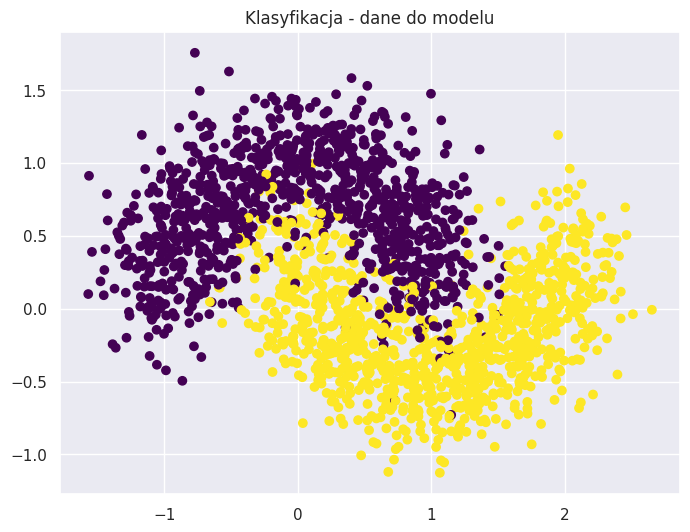

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c=target, cmap='viridis')
plt.title('Klasyfikacja - dane do modelu')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

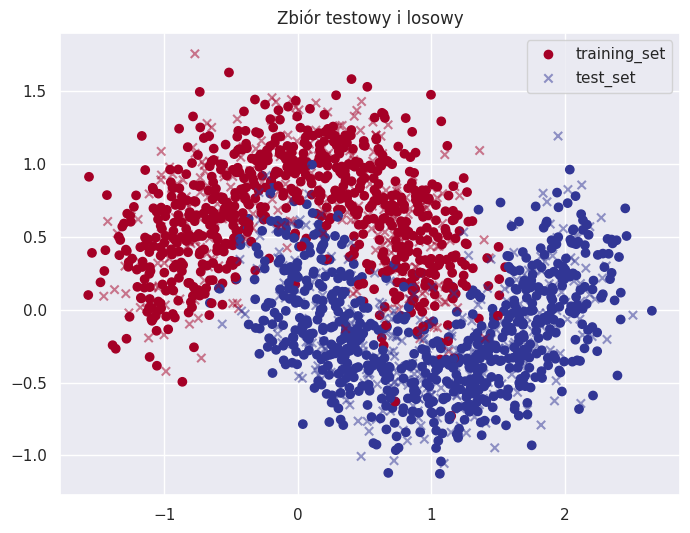

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdYlBu',label='training_set')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór testowy i losowy')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

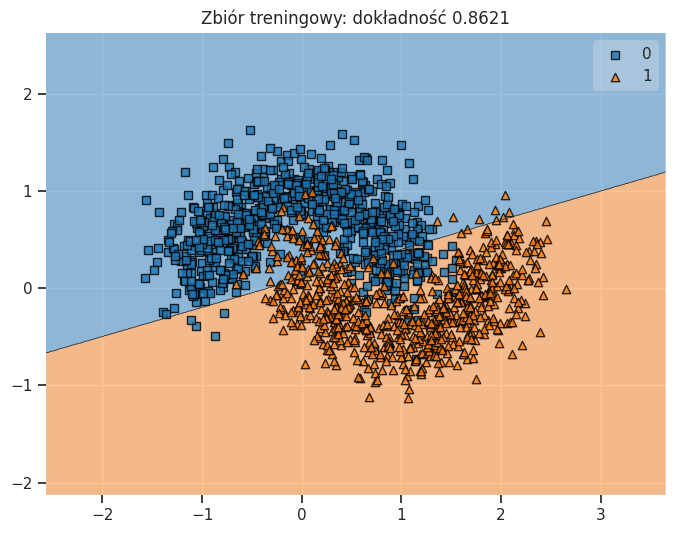

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

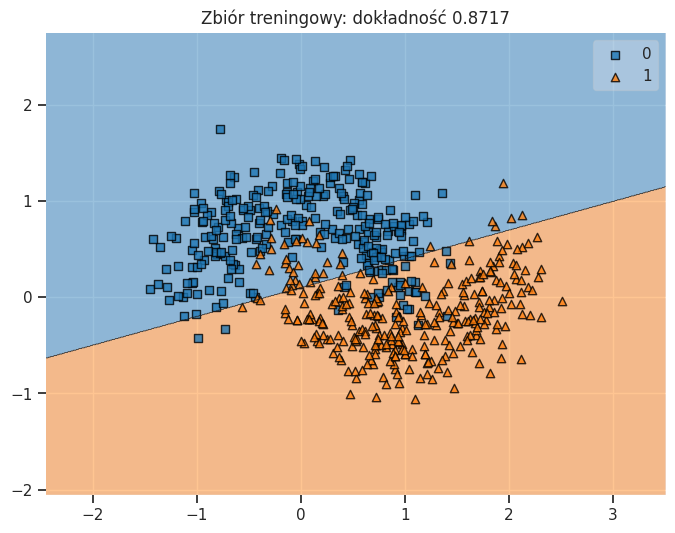

In [ ]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

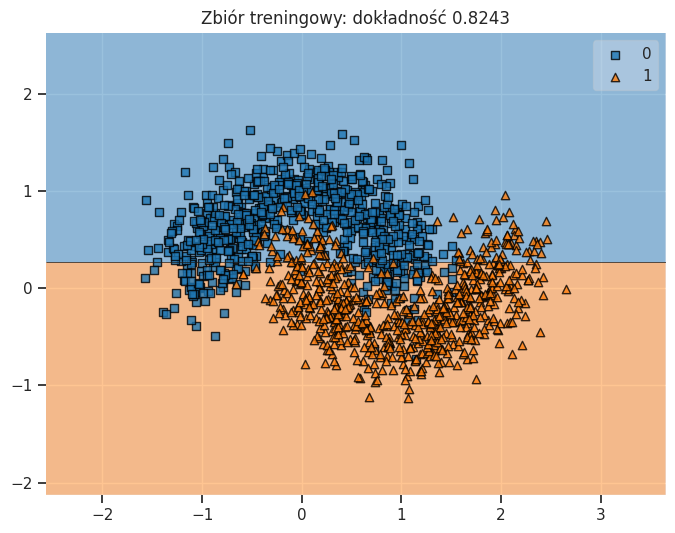

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train, y_train)

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

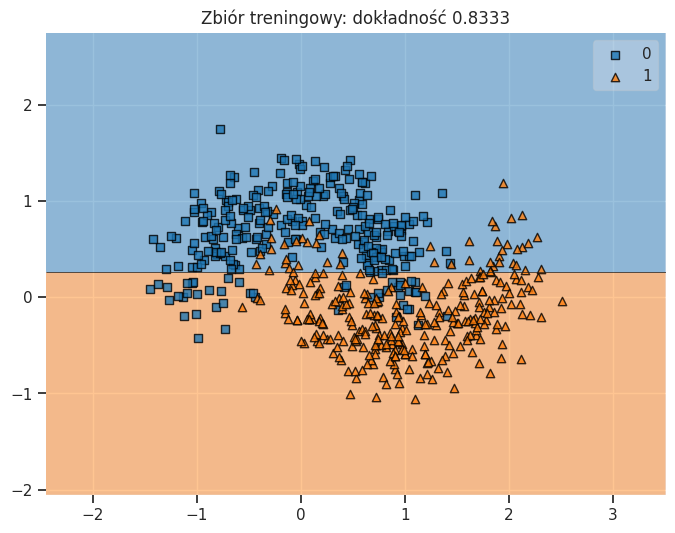

In [ ]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

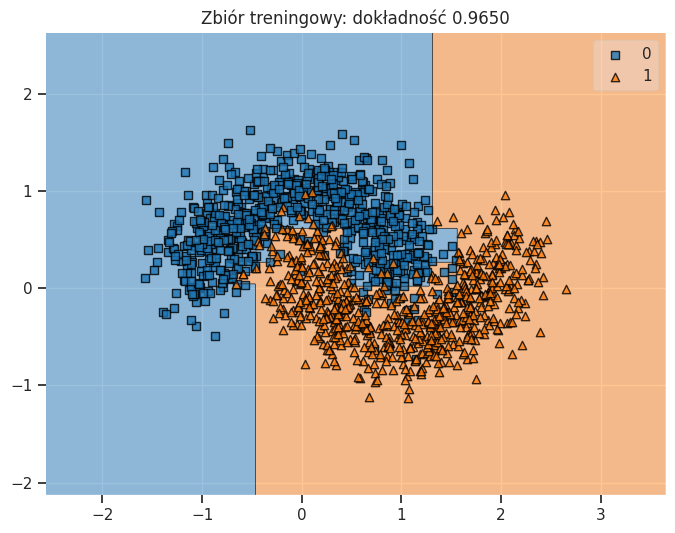

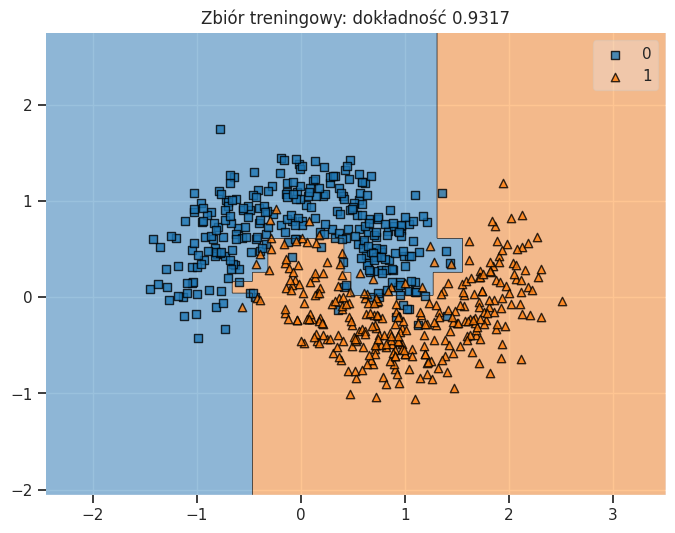

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=6)
classifier.fit(X_train, y_train)

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_test, y_test):.4f}')

plt.show()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set()

In [ ]:
#Przeszukiwanie siatki
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
np.random.seed(42)






In [ ]:
raw_data=make_moons(n_samples=2000, noise=0.25, random_state=42)
data=raw_data[0]
target=raw_data[1]

In [ ]:
df=pd.DataFrame(data=np.c_[data,target], columns=['x1', 'x2', 'target'])
df

x1        x2  target
0     1.582305  0.366876     1.0
1     0.327654  0.982366     0.0
2     0.488270 -0.246765     1.0
3    -0.937421 -0.029429     0.0
4     0.634397 -0.412224     1.0
...        ...       ...     ...
1995  0.259746  0.107342     1.0
1996  0.363180 -0.404324     1.0
1997 -0.982272  0.685059     0.0
1998  0.789171 -0.827167     1.0
1999  0.263393  0.062831     1.0

[2000 rows x 3 columns]

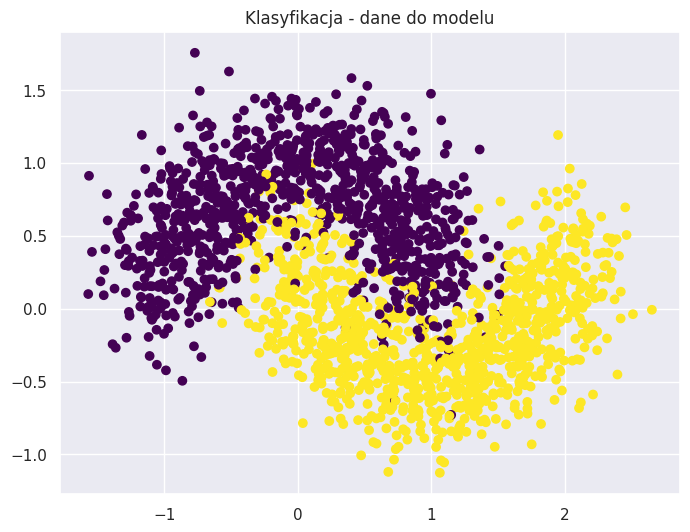

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c=target, cmap='viridis')
plt.title('Klasyfikacja - dane do modelu')
plt.show()

In [ ]:
classifier = DecisionTreeClassifier()

params = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 3, 4, 5,6,7,8,9, 10,15,20]}

grid_search = GridSearchCV(classifier, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             scoring='accuracy')

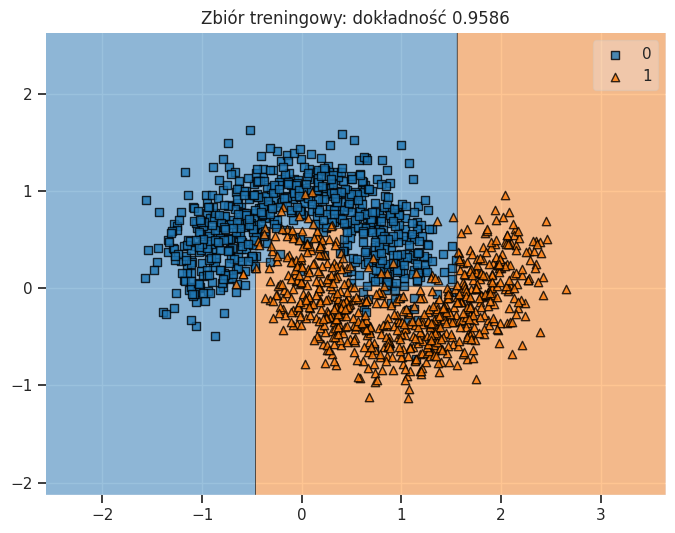

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, grid_search.best_estimator_)
plt.title(f'Zbiór treningowy: dokładność {grid_search.best_estimator_.score(X_train, y_train):.4f}')
plt.show()

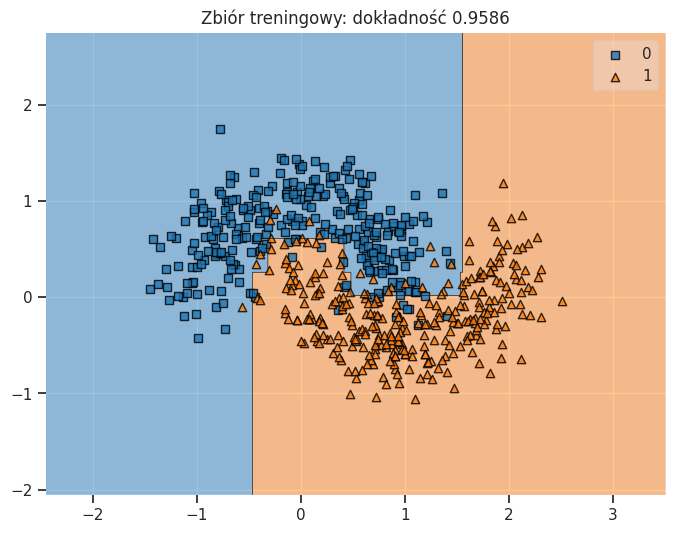

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, grid_search.best_estimator_)
plt.title(f'Zbiór treningowy: dokładność {grid_search.best_estimator_.score(X_train, y_train):.4f}')
plt.show()

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 9}

In [ ]:
# Case study 1

from sklearn import datasets
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
sns.set()

In [ ]:
raw_digits = datasets.load_digits()
digits=raw_digits.copy()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
images=digits['images']
targets=digits['target']

In [ ]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

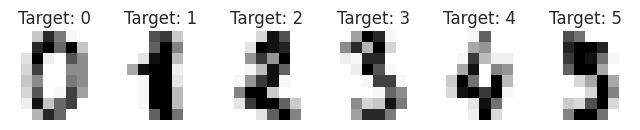

In [ ]:
plt.figure(figsize=(8,6))
for index, (image,target) in enumerate(list(zip(images,targets))[:6]):
  plt.subplot(2,6,index+1)
  plt.axis('off')
  plt.imshow(image, cmap='Greys')
  plt.title(f'Target: {target}')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.3)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (1257, 64)
X_test shape: (540, 64)


In [ ]:
from sklearn.svm import SVC
classifier = SVC(gamma=0.001, kernel='linear')
classifier.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear')

In [ ]:
classifier.score(X_test, y_test)

0.9796296296296296

In [ ]:
from sklearn.svm import SVC
classifier = SVC(gamma=0.001, kernel='rbf')
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [ ]:
classifier.score(X_test, y_test)

0.9925925925925926

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.98      1.00      0.99        56
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        51
           5       0.98      0.98      0.98        53
           6       1.00      1.00      1.00        57
           7       0.98      1.00      0.99        56
           8       1.00      0.98      0.99        47
           9       0.99      0.97      0.98        69

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [ ]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 51,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 67]])

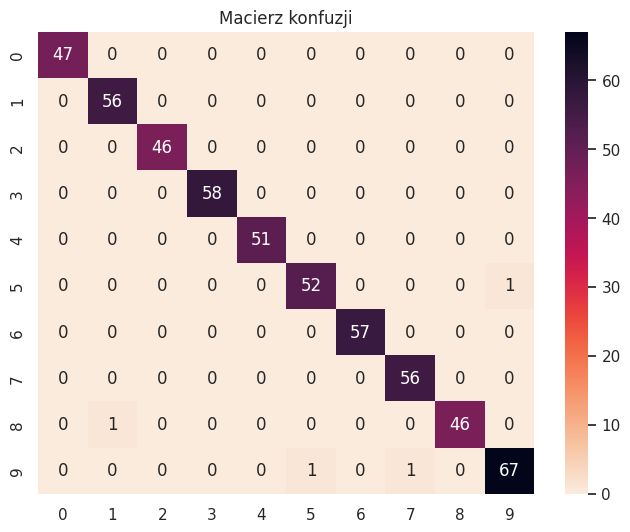

In [ ]:
plt.figure(figsize=(8,6))

plt.title('Macierz konfuzji')
_=sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [ ]:
#Case study 2



from tensorflow.keras.datasets.fashion_mnist import load_data

%tensorflow_version 2.x

np.set_printoptions(precision=12, suppress=True, linewidth=150)

pd.options.display.float_format = '{:.6f}'.format

sns.set(font_scale=1.3)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

TypeError: 'function' object is not subscriptable

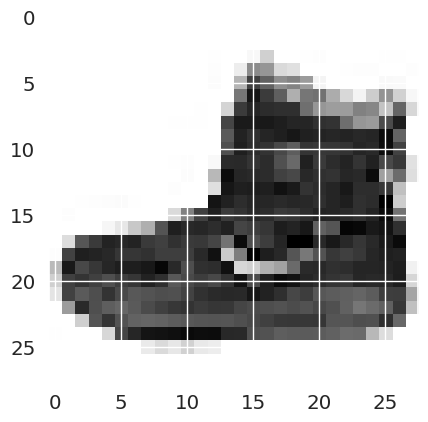

In [ ]:
plt.imshow(X_train[0], cmap='Greys')


In [ ]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

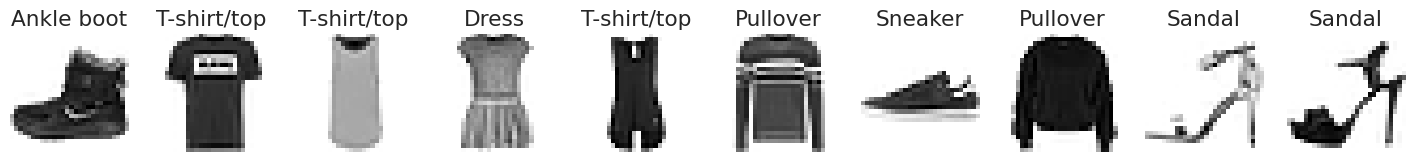

In [ ]:
plt.figure(figsize=(18,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(class_names[y_train[i-1]])
plt.show()

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train=X_train.reshape(60000, 28*28)
X_test=X_test.reshape(10000, 28*28)

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred=classifier.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
#Case study 3
#Praca z danymi tekstowymi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set()

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=1000, formatter=dict(float=lambda x: f'{x:.2f}'))












In [ ]:
documents=[
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
]

In [ ]:
#wektoryzacja tekstu

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit_transform(documents)



<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.fit_transform(documents).toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [ ]:
df=pd.DataFrame(data=vectorizer.fit_transform(documents).toarray(), columns=vectorizer.get_feature_names_out())
df

and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         2      0   1    0       1    1      0     1
2    1         0      0   1    1       0    1      1     1
3    0         1      1   1    0       0    1      0     1

In [ ]:
vectorizer.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

In [ ]:
bigram = CountVectorizer(ngram_range=(1,2), min_df=1)
bigram.fit_transform(documents).toarray()

array([[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]])

In [ ]:
bigram.vocabulary_

{'this': 18,
 'is': 6,
 'the': 12,
 'first': 4,
 'document': 2,
 'this is': 20,
 'is the': 7,
 'the first': 13,
 'first document': 5,
 'second': 10,
 'this document': 19,
 'document is': 3,
 'the second': 14,
 'second document': 11,
 'and': 0,
 'third': 16,
 'one': 9,
 'and this': 1,
 'the third': 15,
 'third one': 17,
 'is this': 8,
 'this the': 21}

In [ ]:
df=pd.DataFrame(data=bigram.fit_transform(documents).toarray(), columns=bigram.get_feature_names_out())
df

and  and this  document  document is  first  first document  is  is the  \
0    0         0         1            0      1               1   1       1   
1    0         0         2            1      0               0   1       1   
2    1         1         0            0      0               0   1       1   
3    0         0         1            0      1               1   1       0   

   is this  one  ...  the  the first  the second  the third  third  third one  \
0        0    0  ...    1          1           0          0      0          0   
1        0    0  ...    1          0           1          0      0          0   
2        0    1  ...    1          0           0          1      1          1   
3        1    0  ...    1          1           0          0      0          0   

   this  this document  this is  this the  
0     1              0        1         0  
1     1              1        0         0  
2     1              0        1         0  
3     1              0        0         1  

[4 rows x 22 columns]

In [ ]:
#TFIDF Transformer

documents=[
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
]






In [ ]:
counts=vectorizer.fit_transform(documents).toarray()
counts

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [ ]:
df = pd.DataFrame(data=counts, columns=vectorizer.get_feature_names_out())
df

and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         2      0   1    0       1    1      0     1
2    1         0      0   1    1       0    1      1     1
3    0         1      1   1    0       0    1      0     1

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer.fit_transform(counts).toarray()

array([[0.00, 0.47, 0.58, 0.38, 0.00, 0.00, 0.38, 0.00, 0.38],
       [0.00, 0.69, 0.00, 0.28, 0.00, 0.54, 0.28, 0.00, 0.28],
       [0.51, 0.00, 0.00, 0.27, 0.51, 0.00, 0.27, 0.51, 0.27],
       [0.00, 0.47, 0.58, 0.38, 0.00, 0.00, 0.38, 0.00, 0.38]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(documents).toarray()

array([[0.00, 0.47, 0.58, 0.38, 0.00, 0.00, 0.38, 0.00, 0.38],
       [0.00, 0.69, 0.00, 0.28, 0.00, 0.54, 0.28, 0.00, 0.28],
       [0.51, 0.00, 0.00, 0.27, 0.51, 0.00, 0.27, 0.51, 0.27],
       [0.00, 0.47, 0.58, 0.38, 0.00, 0.00, 0.38, 0.00, 0.38]])

In [ ]:
from sklearn.datasets import fetch_20newsgroups
raw_data = fetch_20newsgroups(subset='train', categories=['comp.graphics'], random_state=42)
raw_data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
all_data=raw_data.copy()
all_data['data'][:5]

["From: bbs.mirage@tsoft.net (Jerry Lee)\nSubject: Cobra 2.0 1-b-1 Video card HELP ME!!!!\nOrganization: The TSoft BBS and Public Access Unix, +1 415 969 8238\nLines: 22\n\nDoes ANYONE out there in Net-land have any information on the Cobra 2.20 \ncard?  The sticker on the end of the card reads\n        Model: Cobra 1-B-1\n        Bios:  Cobra v2.20\n\nI Havn't been able to find anything about it from anyone!  If you have \nany information on how to get a hold of the company which produces the \ncard or know where any drivers are for it, PLEASE let me know!\n\nAs far as I can tell, it's a CGA card that is taking up 2 of my 16-bit \nISA slots but when I enable the test patterns, it displays much more than \nthe usualy 4 CGA colors... At least 16 from what I can count.. Thanks!\n\n              .------------------------------------------.\n              : Internet: jele@eis.calstate.edu          :\n              :           bbs.mirage@gilligan.tsoft.net  :\n              :           bbs.

In [ ]:
all_data['target_names']

['comp.graphics']

In [ ]:
tfidf=TfidfVectorizer()
tfidf.fit_transform(all_data['data']).toarray

<bound method _cs_matrix.toarray of <584x13756 sparse matrix of type '<class 'numpy.float64'>'
	with 71794 stored elements in Compressed Sparse Row format>>

TfidfVectorizer()

In [ ]:
# movie reviews



!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/movie_reviews.zip

--2025-01-26 23:28:06--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/movie_reviews.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4004848 (3.8M) [application/zip]
Saving to: ‘movie_reviews.zip’

movie_reviews.zip   100%[===================>]   3.82M  --.-KB/s    in 0.09s   

2025-01-26 23:28:06 (44.1 MB/s) - ‘movie_reviews.zip’ saved [4004848/4004848]



In [ ]:

!unzip -q movie_reviews.zip
!pwd
!ls

/content
movie_reviews  movie_reviews.zip  sample_data


In [ ]:
from sklearn.datasets import load_files

raw_movie = load_files('movie_reviews')
movie = raw_movie.copy()
movie.keys()


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:

movie['target'][:10]


array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:

movie['target_names']

['neg', 'pos']

In [ ]:

movie['filenames'][:2]

array(['movie_reviews/neg/cv405_21868.txt', 'movie_reviews/pos/cv190_27052.txt'], dtype='<U33')

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(movie['data'], movie['target'], random_state=42)

print(f'X_train: {len(X_train)}')
print(f'X_test: {len(X_test)}')


X_train: 1500
X_test: 500


In [ ]:

X_train[0]

b'unzipped is a cinematic portrait of isaac mizrahi , an artist whose palette is fabric . \nostensibly , the film is a documentary , but use of that term requires stretching its meaning . \nmany scenes appear staged , and a great deal of cutting-and-pasting has been done in the editing room . \nthe cinema verite effect is a conceit -- genuine spontaneity is at a premium , and everyone is aware of and playing to the camera ( especially would-be actresses like cindy crawford ) . \ndirector douglas keeve ( who was mizrahi\'s lover at the time ) freely admits that he " couldn\'t care less about the truth " but was more interested in capturing " the spirit and love in isaac and in fashion . " \ndespite violating nearly every rule of " legitimate " documentary film making , however , unzipped is a remarkably enjoyable piece of entertainment . \nwhile it sheds only a little light on the behind-the-scenes world of the fashion industry , it presents a fascinating , if incomplete , picture of de

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (1500, 3000)
X_test shape: (500, 3000)


In [ ]:

from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.804

In [ ]:

from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[204,  36],
       [ 62, 198]])

In [ ]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['negative', 'positive'], index=['positive', 'negative'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [ ]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.77      0.85      0.81       240
    positive       0.85      0.76      0.80       260

    accuracy                           0.80       500
   macro avg       0.81      0.81      0.80       500
weighted avg       0.81      0.80      0.80       500



In [ ]:

new_reviews = ['It was awesome! Very interesting story.',
               'I cannot recommend this film. Short and awful.',
               'Very long and boring. Don\'t waste your time.',
               'Well-organized and quite interesting.']

new_reviews_tfidf = tfidf.transform(new_reviews)
new_reviews_tfidf


<4x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [ ]:

new_reviews_tfidf.toarray()

array([[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.34, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]])

In [ ]:

new_reviews_pred = classifier.predict(new_reviews_tfidf)
new_reviews_pred

array([1, 0, 0, 1])

In [ ]:

new_reviews_prob = classifier.predict_proba(new_reviews_tfidf)
new_reviews_prob

array([[0.48, 0.52],
       [0.63, 0.37],
       [0.77, 0.23],
       [0.44, 0.56]])

In [ ]:

np.argmax(new_reviews_prob, axis=1)


array([1, 0, 0, 1])

In [ ]:

movie['target_names']

['neg', 'pos']

In [ ]:

for review, target, prob in zip(new_reviews, new_reviews_pred, new_reviews_prob):
    print(f"{review} -> {movie['target_names'][target]} -> {prob[target]:.4f}")


It was awesome! Very interesting story. -> pos -> 0.5232
I cannot recommend this film. Short and awful. -> neg -> 0.6345
Very long and boring. Don't waste your time. -> neg -> 0.7732
Well-organized and quite interesting. -> pos -> 0.5628
